# <font color=#0404B4>**LAB 02 - TRỰC QUAN HÓA DỮ LIỆU** </font>

### <font color=#0404B4> Bảng thành viên nhóm </font>
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

# <font color=#0404B4>Import thư viện</font>

In [45]:
# !pip install country_converter 
# !pip install plotly
# !pip install bubbly
# !pip install ipykernel
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !python -m ipykernel install --user
# !jupyter nbextension enable --py --sys-prefix widgetsnbextension
# !pip install statsmodels

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
sns.set_theme()
import country_converter as coco
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import geopandas as gpd
from ipywidgets import interact
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")

# <font color=#0404B4> A. Thu thập dữ liệu</font>

### Tại sao lại chọn bộ dữ liệu này?
Nhóm muốn tìm hiểu tuổi thọ trung bình của các nước trên thế giới, cụ thể hơn là về tỉ lệ sinh, tỉ lệ tử và những ảnh hưởng cụ thể tác động lên các yếu tố đã được đề cập. Những quốc gia có tuổi thọ trung bình ở những mức độ cụ thể sẽ thể hiện điều gì qua các yếu tố liên quan khác, liệu có sự liên quan nào giữa tuổi thọ trung bình và mức sống hoặc điều kiện phát triển của một quốc gia hay không. Nhóm có rất nhiều câu hỏi muốn khám phá từ chủ đề tuổi tác trung bình của một quốc gia nên đã quyết định chọn bộ dữ liệu này.

Nhóm đã chọn bộ dữ liệu cung cấp thông tin về tuổi thọ trung bình và các yếu tố liên quan của các quốc gia trên thế giới, và bộ dữ liệu này được nhóm lấy từ [Kaggle](https://www.kaggle.com/datasets/census/international-data?select=midyear_population_5yr_age_sex.csv&fbclid=IwAR1iVkXkPgwGhwS5BuKX7oZnUKSWuAlsCq2odeJZ2rCXMAE_xN_BjgJEpMk).



### Nguồn gốc và giấy phép sử dụng của bộ dữ liệu?
Bộ dữ liệu này được tạo bởi [Cục điều tra dân số Hoa Kỳ](http://www.census.gov/), cung cấp các ước tính về dân số các quốc gia kể từ năm 1950 và dự đoán đến năm 2050. Cụ thể, bộ dữ liệu bao gồm các số liệu dân số giữa năm được chia nhỏ theo độ tuổi và phân bổ giới tính khi sinh. Ngoài ra, chúng cung cấp dữ liệu chuỗi thời gian cho các thuộc tính bao gồm tỷ lệ sinh, tỷ lệ sinh, tỷ lệ tử vong và tỷ lệ di cư.

Bộ dữ liệu được cho phép sử dụng với mục đích phân tích 

   **Lưu ý:** Các quốc gia và khu vực được Bộ Ngoại giao Hoa Kỳ công nhận phải có dân số ít nhất là 5.000 người. Và bộ dữ liệu này được đăng tải vào năm 2017, tức là các dữ liệu được cung cấp từ năm 2018 trở đi được xem là dữ liệu dự đoán.



<a name="2"></a>
# <font color=#0404B4> B. Khám phá và tiền xử lý dữ liệu</font>


### 1. Đọc dữ liệu từ file và merge dữ liệu lại thành một dataframe

Do bộ dữ liệu có nhiều file csv riêng lẻ nên nhóm thực hiện merge các file cần phân tích lại và lưu vào một DataFrame `df`.

- `df1` chứa tập dữ liệu nằm trong file `mortality_life_expectancy.csv`, file này chứa các thông tin liên quan đến tuổi thọ trung bình của các quốc gia.

In [3]:
df1 = pd.read_csv("mortality_life_expectancy.csv")

In [4]:
df1.shape

(15106, 15)

- `df2` chứa tập dữ liệu nằm trong file `age_specific_fertility_rates.csv`, file này chứa các thông tin liên quan đến tỷ suất sinh đặc trưng theo từng độ tuổi.

In [5]:
df2 = pd.read_csv("age_specific_fertility_rates.csv")

In [6]:
df2.shape

(15106, 13)

- `df3` chứa tập dữ liệu nằm trong file `birth_death_growth_rates.csv`, file này chứa các thông tin liên quan đến tỷ lệ sinh - tử và một số vấn đề liên quan của các quốc gia.

In [7]:
df3 = pd.read_csv("birth_death_growth_rates.csv")

In [78]:
df3.shape

(15109, 8)

- `df4` chứa tập dữ liệu nằm trong file `midyear_population.csv`, file này chứa các thông tin về dân số trung bình của các quốc gia.

In [74]:
df4 = pd.read_csv("midyear_population.csv")

In [75]:
df4.shape

(23028, 4)

Ta tiến hành merge cả 4 DataFrame trên.

In [10]:
merge_df=pd.merge(df1,df3,on=['country_code', 'country_name', 'year'])

In [11]:
merge_df_1=pd.merge(merge_df,df2,on=['country_code', 'country_name', 'year'])

In [12]:
df=pd.merge(merge_df_1,df4,on=['country_code', 'country_name', 'year'])

Sau khi merge, DataFrame `df` tổng hợp có tổng cộng 15106 dòng và 32 cột.

In [47]:
df.shape

(15106, 32)

In [48]:
df.head(10)

country_code country_name continent  year  infant_mortality  \
0           SI     Slovenia    Europe  2036              3.39   
1           SI     Slovenia    Europe  2022              3.76   
2           SI     Slovenia    Europe  2023              3.73   
3           SI     Slovenia    Europe  2024              3.70   
4           SI     Slovenia    Europe  2025              3.67   
5           SI     Slovenia    Europe  2026              3.64   
6           SI     Slovenia    Europe  2027              3.61   
7           SI     Slovenia    Europe  2028              3.58   
8           SI     Slovenia    Europe  2029              3.56   
9           SI     Slovenia    Europe  2030              3.53   

   infant_mortality_male  infant_mortality_female  life_expectancy  \
0                   3.76                     3.00            80.90   
1                   4.22                     3.27            79.11   
2                   4.18                     3.25            79.26   
3                   4.14                     3.22            79.40   
4                   4.10                     3.20            79.55   
5                   4.07                     3.18            79.68   
6                   4.03                     3.16            79.81   
7                   4.00                     3.14            79.94   
8                   3.97                     3.12            80.08   
9                   3.93                     3.10            80.21   

   life_expectancy_male  life_expectancy_female  ...  fertility_rate_20_24  \
0                 77.51                   84.52  ...                  60.2   
1                 75.58                   82.89  ...                  56.4   
2                 75.73                   83.02  ...                  56.5   
3                 75.89                   83.15  ...                  56.8   
4                 76.04                   83.29  ...                  56.9   
5                 76.19                   83.41  ...                  57.1   
6                 76.33                   83.53  ...                  57.4   
7                 76.47                   83.65  ...                  57.7   
8                 76.61                   83.77  ...                  58.0   
9                 76.75                   83.89  ...                  58.3   

   fertility_rate_25_29  fertility_rate_30_34  fertility_rate_35_39  \
0                 112.0                  86.3                  32.0   
1                 106.1                  75.5                  26.7   
2                 106.6                  76.2                  27.2   
3                 107.0                  77.1                  27.5   
4                 107.4                  78.0                  27.7   
5                 107.7                  78.9                  27.9   
6                 108.2                  79.6                  28.1   
7                 108.6                  80.2                  28.5   
8                 109.0                  80.8                  29.0   
9                 109.4                  81.7                  29.5   

   fertility_rate_40_44  fertility_rate_45_49  total_fertility_rate  \
0                   8.8                   3.7                1.5555   
1                   6.4                   2.3                1.4110   
2                   6.6                   2.4                1.4213   
3                   6.7                   2.5                1.4316   
4                   6.9                   2.6                1.4419   
5                   7.1                   2.7                1.4523   
6                   7.3                   2.8                1.4626   
7                   7.5                   2.9                1.4729   
8                   7.6                   3.0                1.4832   
9                   7.8                   3.1                1.4936   

   gross_reproduction_rate  sex_ratio_at_birth  midyear_population  
0                   0.7

### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng thể hiện thông tin của 1 quốc gia hoặc vùng lãnh thổ trong 1 năm, ví dụ như: thông tin tử vong và tuổi thọ trung bình (chia thành 2 nhóm nam và nữ), tỉ lệ sinh - tử (chi tiết ra thành những khoảng độ tuổi), tỉ lệ tăng trưởng.
* **Không** có dòng nào có ý nghĩa khác nhau.

### 3. Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược lại. Các thuộc tính `country_code`, `country_name`, `year` được xem là những thuộc tính khóa chính, định danh cho từng mẫu của dataframe.

In [15]:
check_duplicated = set(df.loc[:,['country_code', 'country_name', 'year']].duplicated())

if True in check_duplicated:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
    
if (have_duplicated_rows == True):
    print('Có dòng dữ liệu bị lặp')
else:
    print('Không có dòng dữ liệu nào bị lặp')

Không có dòng dữ liệu nào bị lặp


<h3> 4. Mỗi cột có ý nghĩa gì?</h3>

|STT|Tên cột dữ liệu | <center>Mô tả<center> |<center> Đơn vị <center>|
|--|:------:| ---| --- |
|1|country_code|<center>Mã quốc gia/ mã vùng lãnh thổ<center>|
|2|country_name| <center>Tên quốc gia/ vùng lãnh thổ<center>|
|3|year|<center>Năm thu thập<center>| <center>Năm<center>
|4|infant_mortality| <center> Tỷ lệ tử vong sơ sinh<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|5|infant_mortality_male|<center>Tỷ lệ tử vong sơ sinh ở nam<center>|  <center>Số trẻ em chết sơ sinh/1.000 dân số<center>| 
|6|infant_mortality_female|<center>Tỷ lệ tử vong sơ sinh ở nữ<center>| <center>Số trẻ em chết sơ sinh/1.000 dân số<center>|
|7|life_expectancy|<center>Tuổi thọ trung bình<center>| <center>Năm<center>|
|8|life_expectancy_male|<center>Tuổi thọ trung bình ở nam<center>| <center>Năm<center>|
|9|life_expectancy_female|<center>Tuổi thọ trung bình ở nữ<center>| <center>Năm<center>|
|10|mortality_rate_under5|<center>Tỷ lệ tử vong `dưới 5` tuổi<center>| |
|11|mortality_rate_under5_male|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nam<center>| |
|12|mortality_rate_under5_female|<center>Tỷ lệ tử vong `dưới 5` tuổi ở nữ<center>| |
|13|mortality_rate_1to4|<center>Tỷ lệ tử vong `1-4` tuổi<center>| |
|14|mortality_rate_1to4_male|<center>Tỷ lệ tử vong `1-4` tuổi ở nam<center>|  |
|15|mortality_rate_1to4_female|<center>Tỷ lệ tử vong `1-4`tuổi ở nữ<center>|  |
|16|crude_birth_rate|<center>Tỷ lệ sinh thô<center>|<center>Sinh sản/1.000 dân số<center>|
|17|crude_death_rate|<center>Tỷ lệ tử vong thô<center>|<center>Số người chết/1.000 dân số<center>|
|18|net_migration|<center>Tỷ lệ di cư<center>|<center>Số người di dân/1.000 dân số<center>|
|19|rate_natural_increase|<center>Tỷ lệ tăng tự nhiên<center>|<center>%<center>|
|20|growth_rate|<center>Tỷ lệ tăng trưởng<center>|<center>%<center>|
|21|fertility_rate_15_19|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `15-19`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|22|fertility_rate_20_24|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `20-24`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|23|fertility_rate_25_29|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `25-29`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|24|fertility_rate_30_34|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `30-34`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|25|fertility_rate_35_39|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `35-39`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|26|fertility_rate_40_44|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `40-44`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|27|fertility_rate_45_49|<center>Tỷ lệ sinh sản cụ thể theo độ tuổi `45-49`<center>|<center>Số trẻ sinh/1.000 dân số<center>|
|28|total_fertility_rate|<center>Tỷ lệ sinh sản tổng thể <center>|<center>Con/phụ nữ<center>|
|29|gross_reproduction_rate|<center>Tỷ lệ sinh con gái<center>|<center>Con/phụ nữ<center>|
|30|sex_ratio_at_birth|<center>Tỷ lệ giới tính khi sinh<center>|<center>Số trẻ sinh nam chia sô trẻ sinh nữ<center>|
|31|midyear_population|<center>Dân số trung bình<center>|<center>Người<center>|



* **Thời gian cập nhật dữ liệu:** năm 2017

### 5. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15106 entries, 0 to 15105
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_code                  15106 non-null  object 
 1   country_name                  15106 non-null  object 
 2   year                          15106 non-null  int64  
 3   infant_mortality              15106 non-null  float64
 4   infant_mortality_male         15106 non-null  float64
 5   infant_mortality_female       15106 non-null  float64
 6   life_expectancy               15106 non-null  float64
 7   life_expectancy_male          15106 non-null  float64
 8   life_expectancy_female        15106 non-null  float64
 9   mortality_rate_under5         15106 non-null  float64
 10  mortality_rate_under5_male    15106 non-null  float64
 11  mortality_rate_under5_female  15106 non-null  float64
 12  mortality_rate_1to4           15106 non-null  float64
 13  m

Tạm thời, ta thấy các cột đã ở đúng kiểu dữ liệu, cụ thể `country_code` và `country_name` ở dạng dữ liệu phân loại, còn lại tất cả các cột đều thể hiện độ tuổi và tỉ lệ nên ở dạng `float`, cột thể hiện thời gian (năm) thì ở dạng `int`. Do đó có vẻ như **không** có cột nào sở hữu kiểu dữ liệu không phù hợp cả.

### 6. Với mỗi cột, các giá trị được phân bố như thế nào?

#### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 28 cột thuộc nhóm numeric:
|<center>STT</center>  | <center>Tên cột</center>  | <center>STT</center>  | <center>Tên cột</center> |
|-|  -| -  |  -|
| <center>1| <center>year | <center>15| <center>crude_death_rate|
| <center>2| <center>infant_mortality| <center>16| <center>net_migration|
| <center>3| <center>infant_mortality_male| <center>17| <center>rate_natural_increase|
| <center>4| <center>infant_mortality_female | <center>18| <center>growth_rate|
| <center>5| <center>life_expectancy| <center>19| <center>fertility_rate_15_19|
| <center>6| <center>life_expectancy_male| <center>20| <center>fertility_rate_20_24|
| <center>7| <center>life_expectancy_female| <center>21| <center>fertility_rate_25_29|
| <center>8| <center>mortality_rate_under5| <center>22| <center>fertility_rate_30_34|
| <center>9| <center>mortality_rate_under5_male| <center>23| <center>fertility_rate_35_39|
| <center>10| <center>mortality_rate_under5_female| <center>24| <center>fertility_rate_40_44|
| <center>11| <center>mortality_rate_1to4| <center>25| <center>fertility_rate_45_49|
| <center>12| <center>mortality_rate_1to4_male| <center>26| <center>total_fertility_rate|
| <center>13| <center>mortality_rate_1to4_female| <center>27| <center>gross_reproduction_rate|
| <center>14| <center>crude_birth_rate| <center>28| <center>sex_ratio_at_birth|
| | |<center>29|<center>midyear_population |    

In [17]:
pd.set_option('display.max_colwidth', 200)
numerical_cols = df[df.select_dtypes(exclude=['object']).columns]
numerical_cols.head(5)

year  infant_mortality  infant_mortality_male  infant_mortality_female  \
0  2036              3.39                   3.76                     3.00   
1  2022              3.76                   4.22                     3.27   
2  2023              3.73                   4.18                     3.25   
3  2024              3.70                   4.14                     3.22   
4  2025              3.67                   4.10                     3.20   

   life_expectancy  life_expectancy_male  life_expectancy_female  \
0            80.90                 77.51                   84.52   
1            79.11                 75.58                   82.89   
2            79.26                 75.73                   83.02   
3            79.40                 75.89                   83.15   
4            79.55                 76.04                   83.29   

   mortality_rate_under5  mortality_rate_under5_male  \
0                   3.93                        4.39   
1                   4.43                        5.02   
2                   4.39                        4.97   
3                   4.35                        4.91   
4                   4.31                        4.86   

   mortality_rate_under5_female  ...  fertility_rate_20_24  \
0                          3.44  ...                  60.2   
1                          3.81  ...                  56.4   
2                          3.78  ...                  56.5   
3                          3.74  ...                  56.8   
4                          3.71  ...                  56.9   

   fertility_rate_25_29  fertility_rate_30_34  fertility_rate_35_39  \
0                 112.0                  86.3                  32.0   
1                 106.1                  75.5                  26.7   
2                 106.6                  76.2                  27.2   
3                 107.0                  77.1                  27.5   
4                 107.4                  78.0                  27.7   

   fertility_rate_40_44  fertility_rate_45_49  total_fertility_rate  \
0                   8.8                   3.7                1.5555   
1                   6.4                   2.3                1.4110   
2                   6.6                   2.4                1.4213   
3                   6.7                   2.5                1.4316   
4                   6.9                   2.6                1.4419   

   gross_reproduction_rate  sex_ratio_at_birth  midyear_population  
0                   0.7529              1.0660             1785538  
1                   0.6829              1.0661             1935080  
2                   0.6879              1.0660             1926279  
3                   0.6929              1.0660             1917093  
4                   0.6979              1.0661             1907560  

[5 rows x 29 columns]

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu, min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 28 cột là các thuộc tính thuộc kiểu dữ liệu **numerical**.

In [18]:
def missing_ratio(c):
    return  c.isna().sum()/len(df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

year  infant_mortality  infant_mortality_male  \
missing_ratio     0.0              0.00                   0.00   
min            1950.0              1.15                   0.22   
max            2050.0            298.30                 314.65   

               infant_mortality_female  life_expectancy  life_expectancy_male  \
missing_ratio                     0.00             0.00                  0.00   
min                               0.73            10.01                  9.82   
max                             281.22            91.58                 88.69   

               life_expectancy_female  mortality_rate_under5  \
missing_ratio                    0.00                   0.00   
min                             10.21                   1.44   
max                             94.97                 455.12   

               mortality_rate_under5_male  mortality_rate_under5_female  ...  \
missing_ratio                        0.00                          0.00  ...   
min                                  1.66                          1.21  ...   
max                                466.23                        443.65  ...   

               fertility_rate_20_24  fertility_rate_25_29  \
missing_ratio                   0.0                   0.0   
min                             9.5                  34.1   
max                           363.3                 369.2   

               fertility_rate_30_34  fertility_rate_35_39  \
missing_ratio                   0.0                   0.0   
min                            23.1                   7.2   
max                           338.3                 282.9   

               fertility_rate_40_44  fertility_rate_45_49  \
missing_ratio                   0.0                   0.0   
min                             0.0                   0.0   
max                           201.3                 105.8   

               total_fertility_rate  gross_reproduction_rate  \
missing_ratio                0.0000                   0.0000   
min                          0.6621                  -9.0000   
max                          8.0700                   3.9754   

               sex_ratio_at_birth  midyear_population  
missing_ratio              0.0000        0.000000e+00  
min                       -9.0000        3.145000e+03  
max                        1.4696        1.656554e+09  

[3 rows x 29 columns]

Nhận thấy không có giá trị nào bị thiếu ở tất cả các cột (phần trăm thiếu bằng 0%).
Với dữ liệu ở cột  `year`, dữ liệu được thu thập và dự đoán từ năm 1950 đến năm 2050.

#### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 2 cột thuộc nhóm categorical: `country_code`, `country_name`.


In [19]:
pd.set_option('display.max_colwidth', 200)
object_cols = df[df.select_dtypes(include=['object']).columns]
object_cols.head(5)

country_code country_name
0           SI     Slovenia
1           SI     Slovenia
2           SI     Slovenia
3           SI     Slovenia
4           SI     Slovenia

Với mỗi cột categorical, ta tính tỉ lệ % giá trị thiếu, số lượng giá trị khác nhau (không xét giá trị thiếu), list/ array các giá trị khác nhau (không xét giá trị thiếu).
- Kết quả được lưu vào dataframe `cate_col_profiles_df`.
- Dataframe này có 3 dòng là `missing_ratio`, `num_diff_vals`, `ratio_diff_vals`; và có 2 cột là các thuộc tính có kiểu dữ liệu **categorical**.

In [20]:
def num_diff_vals(col):
    return len(col.value_counts())

def ratio_diff_vals(col):
    return np.round(col.value_counts(normalize=True),2).to_dict()

cate_col_profiles_df=object_cols.agg([missing_ratio,num_diff_vals,ratio_diff_vals])
cate_col_profiles_df

country_code  \
missing_ratio                                                                                                                                                                                                        0.0   
num_diff_vals                                                                                                                                                                                                        228   
ratio_diff_vals  {'BT': 0.01, 'DJ': 0.01, 'NI': 0.01, 'GV': 0.01, 'CB': 0.01, 'CD': 0.01, 'GB': 0.01, 'UG': 0.01, 'WI': 0.01, 'LE': 0.01, 'GH': 0.01, 'AO': 0.01, 'BR': 0.01, 'HA': 0.01, 'NU': 0.01, 'NP': 0.01, 'PA...   

                                                                                                                                                                                                            country_name  
missing_ratio                                                                                                                                                                                                        0.0  
num_diff_vals                                                                                                                                                                                                        228  
ratio_diff_vals  {'Bhutan': 0.01, 'Djibouti': 0.01, 'Nigeria': 0.01, 'Guinea': 0.01, 'Cambodia': 0.01, 'Chad': 0.01, 'Gabon': 0.01, 'Uganda': 0.01, 'Western Sahara': 0.01, 'Lebanon': 0.01, 'Ghana': 0.01, 'Angola':...

- Nhận thấy không có giá trị nào bị thiếu.
- Tổng cộng có 228 giá trị khác nhau ở `country_code` và  `country_name`, đại diện cho 228 quốc gia trên thế giới.

### 7. Có cần phải tiền xử lý dữ liệu hay không?

Do ở trên ta đã kiểm tra và nhận thấy rằng các cột đều đang ở đúng kiểu dữ liệu của nó nên ở đây, ta sẽ kiểm tra xem các cột có đầy đủ dữ liệu hay không.

In [21]:
df.isnull().any()

country_code                    False
country_name                    False
year                            False
infant_mortality                False
infant_mortality_male           False
infant_mortality_female         False
life_expectancy                 False
life_expectancy_male            False
life_expectancy_female          False
mortality_rate_under5           False
mortality_rate_under5_male      False
mortality_rate_under5_female    False
mortality_rate_1to4             False
mortality_rate_1to4_male        False
mortality_rate_1to4_female      False
crude_birth_rate                False
crude_death_rate                False
net_migration                   False
rate_natural_increase           False
growth_rate                     False
fertility_rate_15_19            False
fertility_rate_20_24            False
fertility_rate_25_29            False
fertility_rate_30_34            False
fertility_rate_35_39            False
fertility_rate_40_44            False
fertility_ra

Ta nhận thấy các cột không xuất hiện tình trạng thiếu dữ liệu. Nên tạm thời ta sẽ không thực hiện việc tiền xử lý đối với dữ liệu. Tuy nhiên, nhóm sẽ có thể thực hiện việc tiền xử lý ở phần phân tích tùy thuộc vào hoàn cảnh nhóm sẽ thực hiện.

<a name="6"></a>
# <font color=#0404B4> C. Khám phá mối quan hệ trong dữ liệu</font>

### 1. Tổng quan

### Liệu có mối quan hệ nào giữa hai cặp thuộc tính (dạng numeric) bất kì với nhau?  <br>


**Ý nghĩa khi trả lời câu hỏi:** 

 - Ta sẽ có được cái nhìn tổng quan giữa các thuộc tính trong bộ dữ liệu. Từ đó, ta có thể dựa vào đó để phân tích sau mối quan hệ giữa chúng.

**Nguồn cảm hứng đặt câu hỏi:**
- Do không biết bắt đầu từ đâu để tìm ra mối quan hệ giữa các thuộc tính với nhau nên nhóm quyết định sẽ đi từ phần cơ bản nhất để làm rõ các mối quan hệ.


Thực tế, ta có tổng cộng 29 cột dữ liệu thuộc dạng numeric, nhưng ta chỉ chọn ra các cột thể hiện thông tin tổng hợp để tìm hiểu mối quan hệ giữa các trường dữ liệu. Các trường dữ liệu được chọn sẽ lưu vào DataFrame `selected_df`.

In [22]:
selected_df = df[['infant_mortality',
                   'life_expectancy',
                   'mortality_rate_under5', 
                   'crude_birth_rate', 
                   'crude_death_rate',
                   'net_migration',
                   'rate_natural_increase', 
                   'growth_rate', 
                   'total_fertility_rate', 'gross_reproduction_rate',
                   'sex_ratio_at_birth',
                   'midyear_population']]

Tiếp theo, ta sẽ tính ma trận tương quan giữa các cặp thuộc tính bằng cách sử dụng hàm `corr()`.

In [23]:
corr_matrix = selected_df.corr()
corr_matrix

infant_mortality  life_expectancy  \
infant_mortality                 1.000000        -0.919737   
life_expectancy                 -0.919737         1.000000   
mortality_rate_under5            0.990672        -0.917969   
crude_birth_rate                 0.874196        -0.895451   
crude_death_rate                 0.590078        -0.525920   
net_migration                   -0.025346         0.035120   
rate_natural_increase            0.685421        -0.733155   
growth_rate                      0.222927        -0.228181   
total_fertility_rate             0.878393        -0.864888   
gross_reproduction_rate          0.751159        -0.750064   
sex_ratio_at_birth               0.022104        -0.035786   
midyear_population              -0.012806         0.016960   

                         mortality_rate_under5  crude_birth_rate  \
infant_mortality                      0.990672          0.874196   
life_expectancy                      -0.917969         -0.895451   
mortality_rate_under5                 1.000000          0.869735   
crude_birth_rate                      0.869735          1.000000   
crude_death_rate                      0.629250          0.314335   
net_migration                        -0.024638         -0.036144   
rate_natural_increase                 0.665232          0.926768   
growth_rate                           0.216900          0.303292   
total_fertility_rate                  0.880887          0.977497   
gross_reproduction_rate               0.752264          0.836748   
sex_ratio_at_birth                    0.019651          0.022463   
midyear_population                   -0.018283         -0.048370   

                         crude_death_rate  net_migration  \
infant_mortality                 0.590078      -0.025346   
life_expectancy                 -0.525920       0.035120   
mortality_rate_under5            0.629250      -0.024638   
crude_birth_rate                 0.314335      -0.036144   
crude_death_rate                 1.000000      -0.007383   
net_migration                   -0.007383       1.000000   
rate_natural_increase           -0.065278      -0.035073   
growth_rate                     -0.046770       0.342183   
total_fertility_rate             0.406251      -0.036107   
gross_reproduction_rate          0.339441      -0.033388   
sex_ratio_at_birth              -0.004178      -0.006033   
midyear_population              -0.028678      -0.000991   

                         rate_natural_increase  growth_rate  \
infant_mortality                      0.685421     0.222927   
life_expectancy                      -0.733155    -0.228181   
mortality_rate_under5                 0.665232     0.216900   
crude_birth_rate                      0.926768     0.303292   
crude_death_rate                     -0.065278    -0.046770   
net_migration                        -0.035073     0.342183   
rate_natural_increase                 1.000000     0.337309   
growth_rate                           0.337309     1.000000   
total_fertility_rate                  0.866742     0.284308   
gross_reproduction_rate               0.745358     0.241680   
sex_ratio_at_birth                    0.025509     0.002084   
midyear_population                   -0.039528    -0.011919   

                         total_fertility_rate  gross_reproduction_rate  \
infant_mortality                     0.878393                 0.751159   
life_expectancy                     -0.864888                -0.750064   
mortality_rate_under5                0.880887                 0.752264   
crude_birth_rate                     0.977497                 0.836748   
crude_death_rate                     0.406251                 0.339441   
net_migration                       -0.036107                -0.033388   
rate_natural_increase                0.866742                 0.745358   
growth_rate                          0.284308                 0.241680   
total_fertility_rate                 1.000000                 0.85

Để dễ dàng quan sát và nhận xét, ta sẽ trực quan hóa ma trận trên bằng **Heat map** với thang màu xanh dương - trắng phân kỳ. Màu sắc hiển thị càng dần về xanh đậm hoặc trắng thì độ tương quan giữa hai cặp thuộc tính càng cao, cụ thể:
- Màu càng ngã về xanh thì độ tương quan dương càng cao.
- Màu càng ngã về trắng thì độ tương quan âm càng cao.

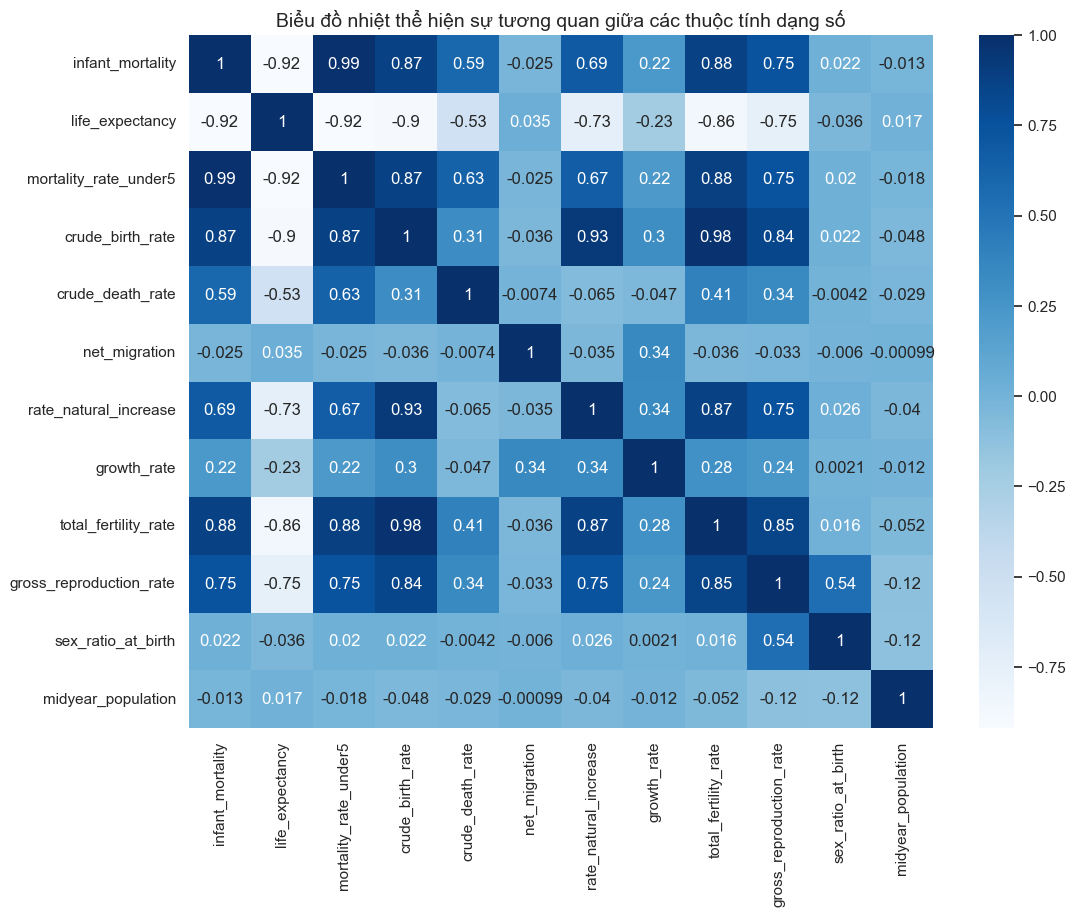

In [120]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
title = plt.title("Biểu đồ nhiệt thể hiện sự tương quan giữa các thuộc tính dạng số", fontsize = 14)
title.set_position([0.5, 1])
plt.show()

#### Nhận xét:
- Nhìn sơ, ta thấy có khá nhiều sự tương quan giữa các cặp thuộc tính trong bộ dữ liệu với độ tương quan cao. 
- Ta nhìn thấy một số cặp có độ **tương quan dương** cao (độ tương quan lớn hơn hoặc bằng 0.75):
    - `infant_mortality` và `mortality_rate_under5`
    - `infant_mortality` và `crude_birth_rate`
    - `infant_mortality` và `total_fertility_rate`
    - `infant_mortality` và `gross_reproduction_rate`
    - `mortality_rate_under5` và `crude_birth_rate`
    - `mortality_rate_under5` và `total_fertility_rate`
    - `mortality_rate_under5` và `gross_reproduction_rate`
    - `crude_birth_rate` và `rate_natural_increase`
    - `crude_birth_rate` và `total_fertility_rate`
    - `crude_birth_rate` và `gross_reproduction_rate`
    - `rate_natural_increase` và `total_fertility_rate`
    - `rate_natural_increase` và `gross_reproduction_rate`
    - `total_fertility_rate` và `gross_reproduction_rate` <br><br>

- Đối với các cặp tương quan dương này, ta có thể hiểu rằng nếu giá trị của một thuộc tính tăng thì giá trị của một thuộc tính khác cũng sẽ tăng theo hoặc sẽ cùng giảm (tương quan tuyến tính), và cụ thể trong bộ dữ liệu này: 
    - Chỉ số tử vong ở trẻ sơ sinh sẽ ảnh hưởng đến chỉ số tử vong của trẻ dưới 5 tuổi, tỉnh lệ sinh thô, tổng tỉ suất sinh, tổng tỉ suất tái sinh sản và ngược lại.
    - Chỉ số tử vọng của trẻ dưới 5 sẽ tác động tác đến tỉ lệ sinh thô, tổng tỉ suất sinh, tổng tỉ xuất tái sinh sản và ngược lại.
    - Tỉ lệ sinh thô sẽ ảnh hưởng tỉ lệ gia tăng dân số tự nhiên, tổng tỉ suất sinh, tổng tỉ xuất tái sinh sản và ngược lại.
    - Tỉ lệ gia tăng dân số tự nhiên sẽ tác động đến tổng tỉ suất sinh, tổng tỉ suất tái sinh sản và ngược lại.
    - Cuối cùng là tổng tỉ suất sinh sẽ tác động đến tổng tỉ suất tái sinh sản và ngược lại. <br><br>



- Một số cặp có độ **tương quan âm** cao (độ tương quan bé hơn hoặc bằng -0.75):
    - `infant_mortality` và `life_expectancy`
    - `life_expectancy` và `mortality_rate_under5`
    - `life_expectancy` và `crude_birth_rate`
    - `life_expectancy` và `total_fertility_rate`
    - `life_expectancy` và `gross_reproduction_rate` <br><br>

- Còn đối với các cặp tương quan âm này, ta có thể hiểu rằng nếu giá trị của một thuộc tính tăng thì giá trị của một thuộc tính khác cũng sẽ giảm hoặc ngược lại (tương quan tuyến tính), và cụ thể trong bộ dữ liệu này:  
    - Nếu chỉ sổ tử vong ở trẻ sơ sinh giảm thì tuổi thọ trung bình của một quốc sẽ tăng và ngược lại.
    - Tuổi thọ trung bình của một quốc gia sẽ giảm nếu một trong các chỉ số sau tăng: chỉ số tử vong của trẻ dưới 5, tỉ lệ sinh thô, tổng tỉ suất sinh, tổng tỉ suất tái sinh sản, và ngược lại.


### 2. Phân tích

Vì có khá nhiều vấn đề khi phân tích cần phải biết được thuộc tính `continent` (tức là tên châu lục của mỗi quốc gia) nên ta sẽ tiến hành tìm tên của châu lục ứng với mỗi quốc gia và tạo thành một thuộc tính mới `continent` cho DataFrame `df` ban đầu. Ở đây, ta sẽ sử dụng thư viện `country_converter` để thực hiện việc chuyển đổi.

In [25]:
# Lấy tên của các quốc gia ra từ bộ dữ liệu và lưu trữ dưới dạng list()
country_split=[]
for x in df['country_name']:
    country_split.append(x.split(','))

# Chuyển đổi từ tên quốc gia thành tên của châu lục 
cc = coco.CountryConverter()
iso_alpha_list = [cc.convert(names=name, to='Continent') for name in country_split]

# Tạo một cột mới có tên là 'continent' trong dataframe
df['continent']= iso_alpha_list

Ta sẽ thay đổi vị trí các cột để dễ dàng quan sát hơn.

In [26]:
df = df[['country_code', 'country_name','continent', 'year', 'infant_mortality',
       'infant_mortality_male', 'infant_mortality_female', 'life_expectancy',
       'life_expectancy_male', 'life_expectancy_female',
       'mortality_rate_under5', 'mortality_rate_under5_male',
       'mortality_rate_under5_female', 'mortality_rate_1to4',
       'mortality_rate_1to4_male', 'mortality_rate_1to4_female',
       'crude_birth_rate', 'crude_death_rate', 'net_migration',
       'rate_natural_increase', 'growth_rate', 'fertility_rate_15_19',
       'fertility_rate_20_24', 'fertility_rate_25_29', 'fertility_rate_30_34',
       'fertility_rate_35_39', 'fertility_rate_40_44', 'fertility_rate_45_49',
       'total_fertility_rate', 'gross_reproduction_rate', 'sex_ratio_at_birth',
       'midyear_population']]
df.head(5)

country_code country_name continent  year  infant_mortality  \
0           SI     Slovenia    Europe  2036              3.39   
1           SI     Slovenia    Europe  2022              3.76   
2           SI     Slovenia    Europe  2023              3.73   
3           SI     Slovenia    Europe  2024              3.70   
4           SI     Slovenia    Europe  2025              3.67   

   infant_mortality_male  infant_mortality_female  life_expectancy  \
0                   3.76                     3.00            80.90   
1                   4.22                     3.27            79.11   
2                   4.18                     3.25            79.26   
3                   4.14                     3.22            79.40   
4                   4.10                     3.20            79.55   

   life_expectancy_male  life_expectancy_female  ...  fertility_rate_20_24  \
0                 77.51                   84.52  ...                  60.2   
1                 75.58                   82.89  ...                  56.4   
2                 75.73                   83.02  ...                  56.5   
3                 75.89                   83.15  ...                  56.8   
4                 76.04                   83.29  ...                  56.9   

   fertility_rate_25_29  fertility_rate_30_34  fertility_rate_35_39  \
0                 112.0                  86.3                  32.0   
1                 106.1                  75.5                  26.7   
2                 106.6                  76.2                  27.2   
3                 107.0                  77.1                  27.5   
4                 107.4                  78.0                  27.7   

   fertility_rate_40_44  fertility_rate_45_49  total_fertility_rate  \
0                   8.8                   3.7                1.5555   
1                   6.4                   2.3                1.4110   
2                   6.6                   2.4                1.4213   
3                   6.7                   2.5                1.4316   
4                   6.9                   2.6                1.4419   

   gross_reproduction_rate  sex_ratio_at_birth  midyear_population  
0                   0.7529              1.0660             1785538  
1                   0.6829              1.0661             1935080  
2                   0.6879              1.0660             1926279  
3                   0.6929              1.0660             1917093  
4                   0.6979              1.0661             1907560  

[5 rows x 32 columns]

### Liệu có mối quan hệ nào giữa tỉ lệ sinh, tỉ lệ tử và dân số trung bình của một khu vực, một quốc gia? Ở khu vực châu Á, điều này được thể hiện như thế nào qua từng giai đoạn?


**Ý nghĩa khi trả lời câu hỏi:** 

 - Ta sẽ biết được mối quan hệ giữa tỉ lệ sinh và tỉ lệ tử theo từng châu lục và từng quốc gia và dân số của một quốc gia sẽ có thể tác động như thế nào đến hai đại lượng kể trên.
 - Tìm và hiểu thêm về một số giai đoạn đặc biệt của châu Á và các nước thuộc khu vực này, các yếu tố như thế nào sẽ ảnh hưởng đến tỉ lệ sinh và tử của một quốc gia.
 - Một số thông tin cơ bản về tỉ lệ sinh - tử, dân số trung bình của một số quốc gia và lí do cho những con số cụ thể đó.

**Nguồn cảm hứng đặt câu hỏi:**
- Liệu thật sự có mối quan hệ giữa tỉ lệ sinh và tử của một quốc gia hay đây chỉ là những đại lượng riêng lẻ, không ảnh hưởng đến nhau. Nhóm muốn tìm ra câu trả lời cho câu hỏi trên và việc một quốc gia có đông dân hay ít dân sẽ ảnh hưởng gì đến các tỉ lệ trên.

Đầu tiên, ta sẽ tách ra các cột cần thiết cho việc phân tích và xử lý. Ở đây, ta chọn các cột `continent`, `country_name`, `year`, `crude_birth_rate` và `midyear_population` và lưu các cột này vào một DataFrame mới `df_rate`

In [34]:
df_rate = df[['continent', 'country_name', 'year', 'crude_birth_rate', 'crude_death_rate', 'midyear_population']].copy()
df_rate

continent     country_name  year  crude_birth_rate  crude_death_rate  \
0        Europe         Slovenia  2036              7.59             14.65   
1        Europe         Slovenia  2022              7.52             12.28   
2        Europe         Slovenia  2023              7.43             12.41   
3        Europe         Slovenia  2024              7.35             12.55   
4        Europe         Slovenia  2025              7.30             12.68   
...         ...              ...   ...               ...               ...   
15101   Oceania  Solomon Islands  2000             34.93              4.53   
15102   Oceania  Solomon Islands  1999             35.48              4.61   
15103   Oceania  Solomon Islands  1998             35.98              4.70   
15104   Oceania  Solomon Islands  1997             36.44              4.79   
15105   Oceania  Solomon Islands  1995             37.17              4.97   

       midyear_population  
0                 1785538  
1                 1935080  
2                 1926279  
3                 1917093  
4                 1907560  
...                   ...  
15101              433730  
15102              421716  
15103              409841  
15104              398091  
15105              375074  

[15106 rows x 6 columns]

Thông tin trong bộ dữ liệu được thu thập từ năm 1950 và có tổng cộng 228 quốc gia, nhưng thực tế chỉ từ năm 2001 trở đi thì bộ dữ liệu mới có gần như đủ thông tin của 228 nước này, do đó ta sẽ chọn phân tích từ năm 2001 trở đi để việc phân tích mang tính khách quan hơn. Tuy nhiên, bộ dữ liệu này lại được cập nhật lần cuối vào năm 2017, vậy tức là từ năm 2018 trở đi, tất cả dữ liệu sẽ mang tính dự đoán. Do đó, để phân tích được dữ liệu thực tế đã có, ta sẽ chỉ lấy dữ liệu từ năm 2001 đến năm 2017.

In [28]:
df_rate_notpredicted = df_rate[(df_rate['year'] <= 2017)]
df_rate_notpredicted = df_rate_notpredicted[(df_rate_notpredicted['year'] >= 2001)]
df_rate_notpredicted

continent     country_name  year  crude_birth_rate  crude_death_rate  \
40       Europe         Slovenia  2001              8.69              9.97   
41       Europe         Slovenia  2002              8.77             10.02   
42       Europe         Slovenia  2003              8.84             10.08   
43       Europe         Slovenia  2004              8.90             10.15   
44       Europe         Slovenia  2005              8.95             10.22   
...         ...              ...   ...               ...               ...   
15096   Oceania  Solomon Islands  2005             31.80              4.19   
15097   Oceania  Solomon Islands  2004             32.49              4.25   
15098   Oceania  Solomon Islands  2003             33.15              4.32   
15099   Oceania  Solomon Islands  2002             33.77              4.38   
15100   Oceania  Solomon Islands  2001             34.37              4.45   

       midyear_population  
40                2011179  
41                2011497  
42                2011604  
43                2011473  
44                2011070  
...                   ...  
15096              495751  
15097              483173  
15098              470654  
15099              458223  
15100              445906  

[3840 rows x 6 columns]

### Các châu lục 

Để có được cái nhìn tổng quát nhất, ta sẽ bắt đầu xem xét mối quan hệ giữa tỉ lệ sinh - tử và dân số từ cái nhìn của từng châu lục. Ta sẽ chọn vẽ **Bubble chart** với:
- Trục x thể hiện tỉ lệ sinh
- Trục y thể hiện tỉ lệ tử
- Kích thước bóng thể hiện dân số trung bình và mỗi bóng sẽ đại diện cho một quốc gia
- 5 màu phân biệt sẽ đại dại cho 5 châu lục, cụ thể: màu xanh lam là Châu Âu, màu đỏ là Châu Á, màu vàng là Châu Phi, màu tím là châu Mỹ và cuối cùng, màu xanh lá là Châu Úc (Châu Đại Dương).

**Bubble chart** giúp ta dễ dàng quan sát cả 3 thuộc tính của dữ liệu cùng một lúc và dễ dàng so sánh, tuy nhiên ta sẽ không thể biết rõ được số liệu cụ thể mà chỉ có thể quan sát được xu hướng, độ lớn của giá trị. Ở đây, ta sử dụng **Animated bubble chart** để theo dõi sự thay đổi của 3 cột dữ liệu `crude_death_rate`, `crude_birth_rate` và `midyear_population` theo thời gian từ năm 2001 đến năm 2017.

In [129]:
fig = px.scatter(df_rate_notpredicted, x='crude_birth_rate', y='crude_death_rate', animation_frame='year',
                 size='midyear_population', color='continent', hover_name="country_name",
        title='Biểu đồ thể hiện tỉ lệ sinh và tỉ lệ tử của các châu lục/quốc gia', log_x=True, size_max=60,
        color_discrete_map={'Asia': '#FF3333', 'Europe': '#3366CC', 'Africa': '#FFCC33', 'America': '#CC99FF', 
                            'Oceania': '#66FF00'})

fig.update_layout(
    yaxis=dict(
        range=[0, 30] 
    ),
)

fig.update_layout(
    legend=dict(title='Châu lục'),  # Thay đổi tên chú thích
    xaxis=dict(title='Tỉ lệ sinh'),  # Thay đổi tên trục x
    yaxis=dict(title='Tỉ lệ tử')  # Thay đổi tên trục y
)

fig.show()

#### Nhận xét:
- Có một sự thật rằng, **tỉ lệ sinh thô** ở đại đa số các châu lục đều có xu hướng **giảm dần** theo thời gian. Tuy nhiên, một số quốc gia thuộc châu Âu lại có xu hướng tăng nhiều hơn tính từ năm 2001, tức là tỉ lệ này vẫn giảm nhưng không đáng kể khi so sánh với sự tăng của tỉ lệ này theo thời gian.
- Nếu để ý kĩ, **Ấn Độ** thuộc châu Á và **Brazil** thuộc châu Mỹ là những quốc gia có tỉ lệ sinh thô giảm mạnh và liên tục. Theo tìm hiểu, tỉ lệ sinh thô giảm mạnh ở các quốc gia này là do các chính sách hỗ trợ kế hoạch hoá gia đình, nâng cao giáo dục và chăm sóc sức khỏe, tăng cường vai trò của phụ nữ trong xã hội và tăng cường kinh tế - cơ hội nghề nghiệp.

- Khi nhìn vào biểu đồ, ta thấy **châu Á** là châu lục sở hữu các quốc gia có **dân số trung bình khổng lồ**, cụ thể là Trung Quốc và Ấn Độ. Nhưng tỉ lệ sinh thô của các quốc gia thuộc châu Á chỉ nằm trong khoảng từ 5 đến 40. Nếu so sánh với các châu lục khác thì châu Á chỉ trội hơn về mặt dân số trung bình, tức là có đông dân số nhất.

- **Tỉ lệ sinh thô cao nhất** có vẻ sẽ thuộc về **châu Phi** với số liệu nằm trong khoảng từ 20 đến gần 60. Theo tìm hiểu, nhiều quốc gia trên châu Phi đang phải đối mặt với nghèo đói, thiếu thốn tài nguyên và khó khăn trong việc đảm bảo nguồn cung cấp nước và thực phẩm cho dân số. Do đó, các gia đình thường có nhiều con để giúp đỡ trong việc lao động và trang trải cuộc sống. Hơn nữa, trình độ giáo dục và chăm sóc sức khỏe trên châu Phi còn thấp, nhiều phụ nữ không có kiến thức về sức khỏe sinh sản và phương pháp tránh thai hiệu quả. Ngoài ra, Châu Phi là một trong những khu vực đông dân nhất thế giới, với dân số dự kiến đạt 2,4 tỷ vào năm 2050. Tình trạng đông dân này cũng góp phần làm tăng tỉ lệ sinh thô trên châu lục.

- **Tỉ lệ sinh thô thấp nhất** thuộc về **châu Âu**, chỉ nằm trong khoảng từ 5 đến 13. Có thể lí giải đơn giản cho vấn đề này, người dân châu Âu đang dần thay đổi cách sống và định hướng, họ chú trọng nhiều hơn vào sự nghiệp, học vấn và quan hệ xã hội hơn là việc sinh con và nuôi dạy gia đình. Các gia đình có xu hướng sinh ít con hơn và tập trung nhiều hơn vào việc đầu tư cho giáo dục và sự phát triển cá nhân. Ngoài ra, trình độ giáo dục và tình hình kinh tế của châu Âu đã được nâng cao, điều này làm cho phụ nữ có nhiều cơ hội hơn để tham gia vào lực lượng lao động và đạt được thành công nghề nghiệp. Điều này lại đồng nghĩa với việc phụ nữ ít có thời gian và nguồn lực để sinh con và chăm sóc gia đình. Tuy nhiên, vẫn còn một số lí do khác chưa được thống kê gây ảnh hưởng đến tỉ lệ sinh thô ở châu Âu. 


- Đối với **tỉ lệ tử**, đa số đều giảm theo thời gian và giao động trung bình từ khoảng 2 đến dưới 15. Châu Phi vừa là châu lục sở hữu tỉ lệ sinh thô cao nhất vừa là châu lục sở hữu tỉ lệ tử gần như cao nhất so với các châu lục khác, tuy nhiên, không chỉ có châu Phi sở hữu tỉ lệ tử cao mà còn có **châu Âu**. Với **Nga** và **Unkraine** là hai quốc gia có tỉ lệ tử cao nhất. Giải thích cho đều này, các quốc gia ở châu Âu có dân số ngày càng già đi, do một phần là tỉ lệ sinh rất thấp làm kéo theo tuổi thọ trung bình của các quốc gia này đi xuống. Dân số già kèm theo bệnh tật đã làm cho tỉ lệ tử vọng thô ở các quốc gia này tăng cao.

### Khu vực Châu Á

Tiếp theo, ta sẽ tìm hiểu về khu vực châu Á, và để làm được điều này ta sẽ lấy ra các nước thuộc khu vực châu Á, lưu vào DataFrame mới `df_rate_asia`.

In [36]:
df_rate_asia = df_rate[df_rate['continent'] == 'Asia']
df_rate_asia.head(10)

continent country_name  year  crude_birth_rate  crude_death_rate  \
122      Asia     Mongolia  2036             12.93              7.52   
123      Asia     Mongolia  2021             16.10              6.33   
124      Asia     Mongolia  2022             15.60              6.36   
125      Asia     Mongolia  2023             15.14              6.39   
126      Asia     Mongolia  2024             14.68              6.44   
127      Asia     Mongolia  2025             14.21              6.49   
128      Asia     Mongolia  2026             13.82              6.55   
129      Asia     Mongolia  2027             13.52              6.62   
130      Asia     Mongolia  2028             13.31              6.69   
131      Asia     Mongolia  2029             13.13              6.78   

     midyear_population  
122             3506492  
123             3197529  
124             3225568  
125             3252195  
126             3277423  
127             3301176  
128             3323506  
129             3344643  
130             3364818  
131             3384187

### Tỉ lệ sinh khu vực Châu Á năm 2003 như thế nào?  <br>


**Ý nghĩa khi trả lời câu hỏi:** 
- Nắm được tình hình chung của tỉ lệ sinh các quốc gia khu vực Châu Á năm 2003

**Nguồn cảm hứng đặt câu hỏi:**
- Đại dịch SARS xuất hiện vào HongKong vào cuối năm 2002, sau đó lan sang các nước lân cận và bùng nổ vào năm 2003.
- Các nước đã thực hiện các biện pháp cách ly xã hội để ngăn chặn sự lây lăn nhanh chóng của dịch bênh, liệu điều đó có ảnh hưởng gì đến tỉ lệ sinh của các nước châu Á vào năm 2003

**Tại sao lại sử dụng biểu đồ World Map:**
- **World Map** có thể hiển thị dữ liệu từ nhiều quốc gia khác nhau, nó cho phép chúng ta so sánh các mức độ tỉ lệ sinh giữa các quốc gia. Chúng ta có thể trực quan xác định được các khu vực có mức tỉ lệ sinh cao hoặc thấp nhất.
- Với biểu đồ **World Map**, ta có thể hiển thị được các mô hình địa lý và sự phân bố của các quốc gia. Ví dụ như, các nước nằm trong khu vực Đông Nam Á có tỉ lệ sinh cao hơn so với khu vực Trung Á.


Ta sẽ tiến hành so sánh tỉ lệ sinh của các quốc gia Châu Á năm 2001 và năm 2003 bằng cách trực quan hóa thành **Choropleth Map**. Khi sử dụng biểu đồ này, ta sẽ có được cái nhìn thông qua mặt vị trí địa lí của các quốc gia, các trường dữ liệu sẽ được mã hóa bằng các thang màu để thể hiện các giá trị.

In [37]:
rate_year = 2001 
df_rate_asia_year = df_rate[df_rate["year"] == rate_year]

# biểu diễn dữ liệu trên bản đồ thế giới
fig = px.choropleth(df_rate_asia_year, 
                    locations="country_name", 
                    locationmode='country names',
                    color="crude_birth_rate",
                    hover_name="country_name", 
                    hover_data=["crude_birth_rate"],
                    range_color=[0, 50],
                    color_continuous_scale="Viridis",
                    labels={'crude_birth_rate':'Tỉ lệ sinh'})

# cấu hình layout cho biểu đồ
fig.update_layout(title_text=f'Tỉ lệ sinh của các quốc gia khu vực châu Á năm {rate_year}',
                  geo=dict(showframe=False, projection_type='equirectangular'))

# hiển thị biểu đồ
fig.show()

**Nhận xét:**
- Dịch SARS không ảnh hưởng trực tiếp đến quá trình sinh sản của con người.
Tuy nhiên, việc giới hạn di chuyển và giới hạn giao tiếp xã hội đã làm cho nhiều người chậm lại trong quá trình tìm kiếm người yêu và kết hôn.
Do đó, có thể thấy một số quốc gia trong khu vực Châu Á có tỉ lệ sinh giảm. Cụ thể ở Trung Quốc, tỉ lệ sinh giảm từ 12.34 (năm 2001) còn 11.77 (nằm 2003), Lào giảm từ 34.91 (nằm 2001) còn 31.99 (năm 2003)

### Tỉ lệ sinh và tỉ lệ tử của Cambodia từ năm 1950 đến năm 1980 thay đổi như thế nào?  <br>


**Ý nghĩa khi trả lời câu hỏi:** 
- Nắm được sự dịch chuyển của tỉ lệ sinh, tử lệ tử của Cambodia từ năm 1950 đến năm 1980

**Nguồn cảm hứng đặt câu hỏi:**
- Từ năm 1975 đến năm 1979, ở Cambodia xảy ra cuộc diệt chủng do Pol Pot lãnh đạo.
Các ước tính cho thấy có từ 500.000 đến 3 triệu người đã chết trong cuộc diệt chủng này.
Liệu ở trong dataset có thể hiện thông qua tỉ lệ tử hay không.


Đầu tiên, ta lấy dữ liệu của Cambodia từ năm 1950 đến năm 1980 và sắp xếp dữ liệu theo thời gian tăng dần.

In [38]:
df_rate_cambodia_1950_1980 = df_rate_asia[(df_rate_asia["country_name"] == "Cambodia") & (df_rate_asia["year"] >= 1950) & (df_rate_asia["year"] <= 1980)]
df_rate_cambodia_1950_1980.sort_values(by='year', inplace=True)
df_rate_cambodia_1950_1980.head()

continent country_name  year  crude_birth_rate  crude_death_rate  \
6128      Asia     Cambodia  1962             49.72             22.27   
6096      Asia     Cambodia  1963             48.73             21.23   
6127      Asia     Cambodia  1964             47.78             20.66   
6126      Asia     Cambodia  1965             46.89             20.14   
6125      Asia     Cambodia  1966             46.08             19.66   

      midyear_population  
6128             6083619  
6096             6253081  
6127             6426174  
6126             6601609  
6125             6779482

Tiếp theo ta sẽ sử dụng **biểu đồ Scatter** để trực quan hóa tỉnh lệ sinh - tử của Cambodia từ năm 1950 đến 1980, với thang màu phân kì dùng để nhận biết thời gian (năm) và đường nối để thể hiện xu hướng thay đổi của dữ liệu.

Việc dùng **biểu đồ Scatter** kết hợp vẽ **đường nối** giữa các điểm sẽ giúp: 
- Biểu đồ scatter cho phép hiển thị mối quan hệ giữa hai biến tỉ lệ sinh và tỉ lệ tử
- Việc vẽ đường nối giữa các điểm trên biểu đồ scatter cho phép thể hiện sự thay đổi của các biến theo thời gian.
Nếu đường nối giữa các điểm có xu hướng tăng hoặc giảm, ta có thể xác định được xu hướng tổng thể của các biến đó trong khoảng thời gian đó.



In [39]:
fig = px.scatter(df_rate_cambodia_1950_1980, x='crude_death_rate', y='crude_birth_rate', color='year',
                 width=1200, height=600, 
                 range_x=[0, max(df_rate_cambodia_1950_1980['crude_death_rate'])+5], 
                 range_y=[0, max(df_rate_cambodia_1950_1980['crude_birth_rate'])+5], 
                 labels={'crude_birth_rate': 'Birth Rate', 'crude_death_rate': 'Death Rate', 'year': 'Year'})

fig.update_traces(mode='markers+lines')

fig.update_layout(title='Biểu đồ thể hiện tỉ lệ sinh, tỉ lệ tử của Cambodia từ năm 1950 đến 1980')

fig.show()


**Nhận xét:**
- Từ biểu đồ ta có thể thấy, bắt đầu từ năm 1974, tỉ lệ sinh giảm và tỉ lệ tử bắt đầu tăng lên nhanh chóng, đạt cực đỉnh vào năm 1975 (tỉ lệ tử là 65.43, tỉ lệ sinh 32.78). Điều này cho thấy Chính sách diệt chủng đã gây ra một sự giảm sút đáng kể về dân số và tỉ lệ sinh sản ở Cambodia.
- Trong các giai đoạn tiếp theo, tỉ lệ sinh đã có xu hướng tăng lên và tỉ lệ tử giảm xuống.

### Phân tích tỉ lệ sinh sản theo độ tuổi trong 20 năm (kể từ lần cập nhật dữ liệu cuối cùng) của các quốc gia ở khu vực ASEAN<br>

**Ý nghĩa khi trả lời câu hỏi:** 

* Tương quan giữa tỉ lệ sinh sản theo độ tuổi với nhau, tương quan giữa tỉ lệ sinh sản với độ tuổi trong khu vực Đông Nam Á chúng ta trước đây và hiện tại.
* Sự phân bố tỉ lệ sinh sản theo độ tuổi.
* Sự thay đổi, biến thiên của tỉ lệ sinh sản theo độ tuổi của các nước trong khối ASEAN theo từng năm.

**Nguồn cảm hứng đặt câu hỏi:**

* Thêm kiến thức về các mối quan hệ giữa tỉ lệ sinh sản theo độ tuổi với nhau và giữa tỉ lệ sinh sản với độ tuổi. 

Trích những thuộc tính cần thiết để phân tích tỉ lệ sinh sản theo độ tuổi của các quốc gia/vùng lãnh thổ.


In [49]:
detail_fertility=df.loc[:,['country_code','country_name','year','fertility_rate_15_19',
                           'fertility_rate_20_24','fertility_rate_25_29','fertility_rate_30_34',
                           'fertility_rate_35_39','fertility_rate_40_44','fertility_rate_45_49',
                           'total_fertility_rate','gross_reproduction_rate','sex_ratio_at_birth']].copy()

Chọn ra dữ liệu 20 năm gần đây nhất: từ năm 1997 đến năm 2017.

In [50]:
detail_fertility=detail_fertility[(detail_fertility.year <= 2017) & (detail_fertility.year >= 1997)]

Các thành viên trong ASEAN bao gồm:

|<center>STT | <center>Tên quốc gia| <center>country_name|
|-|  -| -  |
| <center>1| <center>Brunei | <center>Brunei|
| <center>2| <center>Campuchia| <center>Cambodia|
| <center>3| <center>Đông Timo| <center>Timor-Leste
| <center>4| <center>Indonesia | <center>Indonesia|
| <center>5| <center>Lào| <center>Laos|
| <center>6| <center>Malaysia| <center>Malaysia|
| <center>7| <center>Myanmar| <center>Burma|
| <center>8| <center>Philippine| <center>Philippines|
| <center>9| <center>Singapore| <center>Singapore|
| <center>10| <center>Thái Lan| <center>Thailand|
| <center>11| <center>Việt Nam| <center>Vietnam|


In [51]:
country_name_ASEAN=['Brunei','Cambodia','Timor-Leste',
                    'Indonesia','Laos','Malaysia','Burma',
                    'Philippines','Singapore','Thailand','Vietnam']

detail_fertility=detail_fertility[detail_fertility.country_name.isin(country_name_ASEAN)]

Dùng **biểu đồ boxplot** để quan sát được phân bố tỉ lệ sinh ở các độ tuổi:

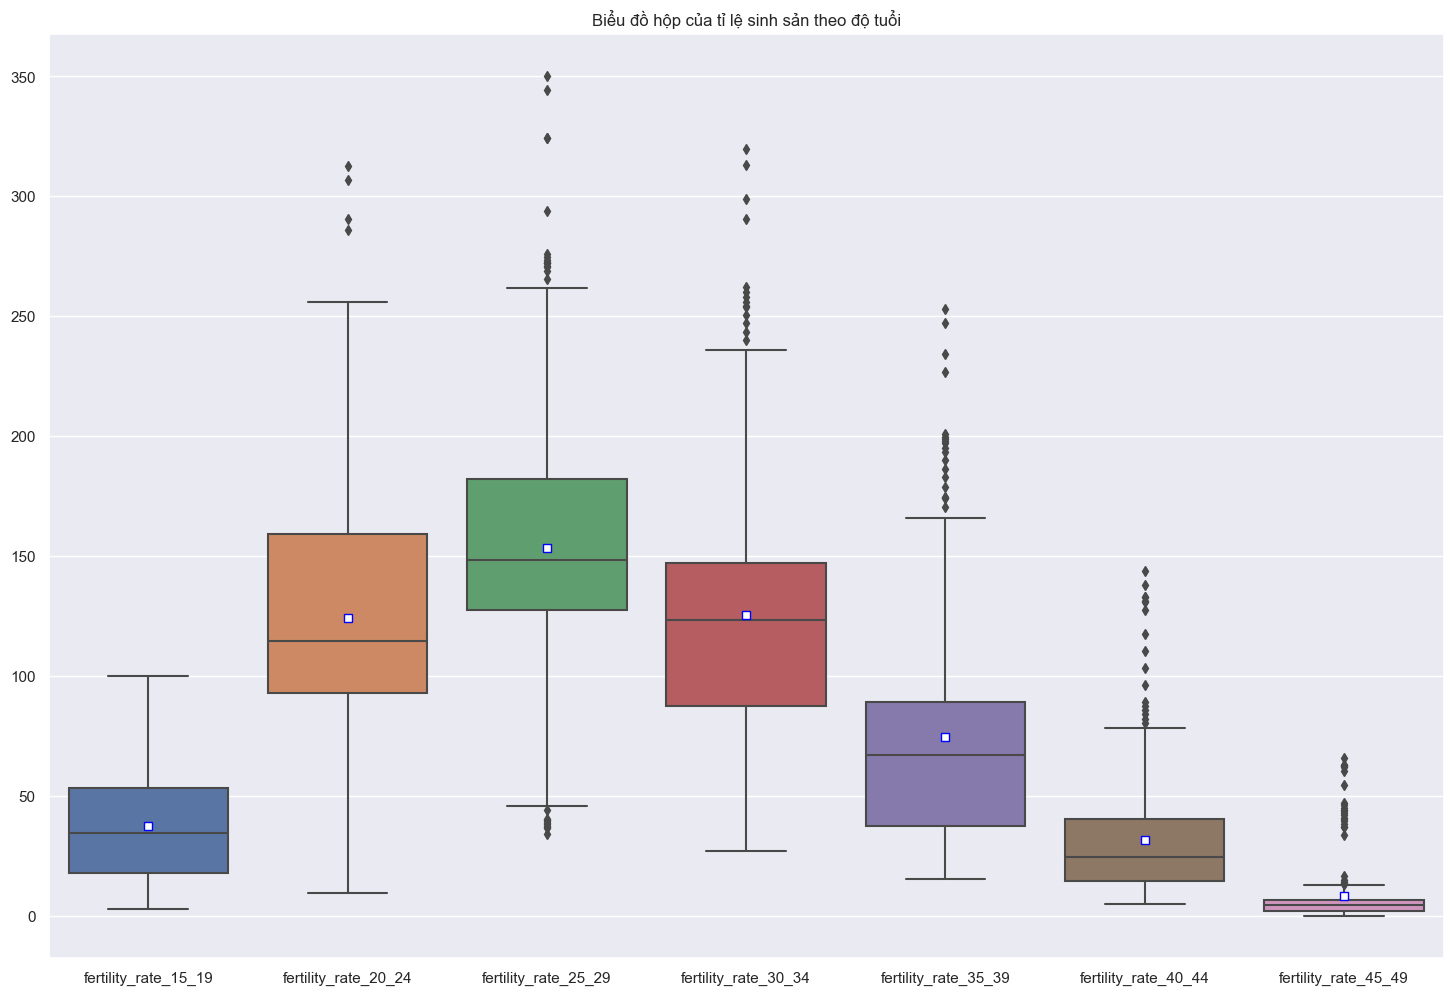

In [52]:
fig,ax=plt.subplots(figsize=(18,12))

sns.boxplot(data=detail_fertility.iloc[:,3:-3],showmeans=True,meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue"},ax=ax)
ax.set_title("Biểu đồ hộp của tỉ lệ sinh sản theo độ tuổi")

plt.show()

#### Nhận xét:
- Tỉ lệ sinh sản ở các độ tuổi `20-24`, `25-29`, `30-34` và `35-39` có sự phân bố khá lớn.
- Tỉ lệ sinh sản trung bình cao nhất là từ `25-29` tuổi.
- Ngược lại thì độ tuổi `45-49` tỉ lệ thấp, có ít nến phân bố hẹp hơn hẳn so với các độ tuổi khác.

Tiếp theo, ta sẽ dùng `biểu đồ đường kết hợp tương tác` để theo dõi sự thay đổi của tỉ lệ sinh sản theo độ tuổi qua các năm của các nước ASEAN:
- Các bước thực hiện:
    - Ở đây nhóm sử dụng hàm `interact` trong thư viện `ipywedgets` để có thể chọn độ tuổi của tỉ lệ sinh làm trục y của biểu đồ
    - Trong hàm `line_plot` thực hiện chọn, trích, biến đổi dữ liệu cho phù hợp để vẽ biểu đồ. Thêm các đường(quốc gia) vào biểu đồ. Thêm các chú thích cho biểu đồ.

In [54]:
# Chọn màu cho các nước
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff1493', '#d62728']
def line_plot(attribute='fertility_rate_25_29'):
    # Chọn, biến đổi dữ liệu về dataframe với cột là các nước, dòng là năm
    temp_df=detail_fertility.pivot('year','country_name',attribute)
    temp_df=temp_df.sort_index().fillna(0)
    temp_df.reset_index(inplace=True)

    # Khởi tạo biểu đồ
    fig = go.Figure()

    # Thêm các đường thể hiện sự biến đổi của các quốc gia vào
    for i,col in zip(range(0,len(colors),1),temp_df.columns[1:]):
        fig.add_trace(go.Scatter(x=temp_df.year, y=temp_df[col], mode='lines', line=dict(color=colors[i]), name=col))

    # Hiển thị thông tin khi đưa con trỏ chuột vào
    fig.update_layout(hovermode='x')

    # Thiệt lập nhãn ở trục x và giới hạn cho trục y
    xtickvals = np.arange(1997, 2018, 1)
    xticktext = [str(year) for year in xtickvals]
    fig.update_xaxes(tickvals=xtickvals, ticktext=xticktext)
    fig.update_yaxes(range=[0, 375])
    
    # Thêm tên biểu đồ và nhãn chú thích phân biệt giữa các đường(quốc gia)
    inteval_age=re.findall(r'\d{2}',attribute)
    fig.update_layout(title='Fertility Age '+inteval_age[0]+' to '+inteval_age[1] + ' of ASEAN countries', xaxis_title='Year', yaxis_title=attribute)
    fig.update_layout(legend=dict(y=0.5, x=1.05))
    fig.show()

In [56]:
interact(line_plot,attribute=['fertility_rate_15_19','fertility_rate_20_24'
                              ,'fertility_rate_25_29', 'fertility_rate_30_34',
                              'fertility_rate_35_39','fertility_rate_40_44','fertility_rate_45_49'])

interactive(children=(Dropdown(description='attribute', index=2, options=('fertility_rate_15_19', 'fertility_r…

<function __main__.line_plot(attribute='fertility_rate_25_29')>

#### Nhận xét:
- Theo quan sát trên tất cả các độ tuổi thì tỉ lệ sinh sản có xu hướng giảm trên toàn bộ các nước trong ASEAN.
- Đông Timo là nước có độ biến đổi tỉ lệ sinh sản nhiều nhất, rơi vào những năm 1999 đến 2004 ở các nhóm độ tuổi `20-24` , `25-29` , `30-35` và `35-39`.
- Singapore là nước có tỉ lệ sinh sản thấp nhất ở hầu hết các độ tuổi.
- Việt Nam ta là nước có tỉ lệ sinh sản nằm ở tầm trung so với của các nước ASEAN. Tốc độ không cao, cũng không thấp.

Dùng `biểu đồ heatmap` để biểu diễn tương quan giữa tỉ lệ sinh sản giữa các độ tuổi với nhau:

In [57]:
corr_matrix_fertility=detail_fertility.iloc[:,2:-3].corr()
corr_matrix_fertility

year  fertility_rate_15_19  fertility_rate_20_24  \
year                  1.000000             -0.258968             -0.283133   
fertility_rate_15_19 -0.258968              1.000000              0.814928   
fertility_rate_20_24 -0.283133              0.814928              1.000000   
fertility_rate_25_29 -0.222001              0.574684              0.893028   
fertility_rate_30_34 -0.179341              0.444138              0.784326   
fertility_rate_35_39 -0.203655              0.499689              0.817471   
fertility_rate_40_44 -0.225455              0.560094              0.839673   
fertility_rate_45_49 -0.131366              0.449410              0.712720   

                      fertility_rate_25_29  fertility_rate_30_34  \
year                             -0.222001             -0.179341   
fertility_rate_15_19              0.574684              0.444138   
fertility_rate_20_24              0.893028              0.784326   
fertility_rate_25_29              1.000000              0.955047   
fertility_rate_30_34              0.955047              1.000000   
fertility_rate_35_39              0.924029              0.978486   
fertility_rate_40_44              0.887207              0.919692   
fertility_rate_45_49              0.737726              0.779983   

                      fertility_rate_35_39  fertility_rate_40_44  \
year                             -0.203655             -0.225455   
fertility_rate_15_19              0.499689              0.560094   
fertility_rate_20_24              0.817471              0.839673   
fertility_rate_25_29              0.924029              0.887207   
fertility_rate_30_34              0.978486              0.919692   
fertility_rate_35_39              1.000000              0.961476   
fertility_rate_40_44              0.961476              1.000000   
fertility_rate_45_49              0.861516              0.908640   

                      fertility_rate_45_49  
year                             -0.131366  
fertility_rate_15_19              0.449410  
fertility_rate_20_24              0.712720  
fertility_rate_25_29              0.737726  
fertility_rate_30_34              0.779983  
fertility_rate_35_39              0.861516  
fertility_rate_40_44              0.908640  
fertility_rate_45_49              1.000000

In [64]:
# Chọn màu cho các nước
years_value=np.sort(detail_fertility.year.unique())
def heatmap_corr(year=2017):
    corr_matrix_fertility=detail_fertility[detail_fertility['year']==year].iloc[:,3:-3].corr()
    corr_matrix_fertility
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix_fertility, annot = True, cmap = 'Blues')
    plt.title("Bản đồ tương quan", fontsize = 22)
interact(heatmap_corr,year=years_value)

interactive(children=(Dropdown(description='year', index=20, options=(1997, 1998, 1999, 2000, 2001, 2002, 2003…

<function __main__.heatmap_corr(year=2017)>

#### Nhận xét:
-  Trong tất cả các năm, tỉ lệ sinh sản giữa khoảng độ tuổi gần nhau (ví dụ [25-29] với [20-24] và với [20-34]) luôn đạt hệ số tương quan xấp xỉ 1. Chứng tỏ có có sự tương quan dương mạnh giữa tỉ lệ sinh sản của những độ tuổi sát nhau.
- Khi 1 tỉ lệ sinh sản của khoảng độ tuổi tăng, thì tỉ lệ sinh sản của khoảng độ tuổi liền trước và sau cũng tăng theo. Ta có thể giải thích mối tương quan này như sau, Khi tỉ lệ sinh sản của một khoảng độ tuổi tăng, sẽ tạo ra hệ quả là có nhiều trẻ em sinh ra trong khoảng đó, và khi trẻ em này trưởng thành và đến độ tuổi sinh sản, tỉ lệ sinh sản của khoảng độ tuổi liền trước và sau sẽ tăng lên.

Tính hệ số tương quan giữa độ tuổi với tỉ lệ sinh sản

In [59]:
def get_age_range(col_name):
    age = re.findall(r'\d{2}', col_name)
    return '[' + age[0] + '-' + age[1] + ']'

fertility_age_df_to_calc_spearman=detail_fertility.iloc[:,2:-3].melt(id_vars='year',value_name='fertility_rate',var_name='age').copy()
fertility_age_df_to_calc_spearman=fertility_age_df_to_calc_spearman.sort_values(['year','age','fertility_rate'])
fertility_age_df_to_calc_spearman.age=fertility_age_df_to_calc_spearman.age.apply(get_age_range)

spearman_age_fertility={'year':[],'corr_spearman':[]}
for year in np.sort(fertility_age_df_to_calc_spearman.year.unique()):
    calc_df_corr=fertility_age_df_to_calc_spearman[fertility_age_df_to_calc_spearman.year==year]
    corr_spearman = calc_df_corr['age'].corr(calc_df_corr['fertility_rate'], method='spearman')

    spearman_age_fertility['year'].append(year)
    spearman_age_fertility['corr_spearman'].append(corr_spearman)
spearman_age_fertility=pd.DataFrame(spearman_age_fertility)

In [60]:
spearman_age_fertility.iloc[spearman_age_fertility.corr_spearman.idxmin()]

year             2006.000000
corr_spearman      -0.463805
Name: 9, dtype: float64

In [61]:
spearman_age_fertility.iloc[spearman_age_fertility.corr_spearman.idxmax()]

year             2002.000000
corr_spearman      -0.424801
Name: 5, dtype: float64

Dùng `Biểu đồ Scatter` để xem phân bố giữa độ tuổi và tỉ lệ sinh sản qua các năm.

In [62]:
fig = px.scatter(fertility_age_df_to_calc_spearman, x='age', y='fertility_rate', animation_frame='year',color='age')
fig.update_yaxes(range=[0, 375])

fig.update_layout(title=f'Scatter Plot of Age and Fertility Rate Year')

fig.show()

#### Nhận xét:
- Dựa vào biểu đồ phân tán và kết quả hệ số Spearman giữa độ tuổi và tỉ lệ sinh sản ta thấy rằng: mối tương quan âm yếu, độ tuổi tăng thì tỉ lệ sinh sản giảm.
- Năm 2006 (corr_spearman=-0.464) là năm mà tương quan giữa độ tuổi với tỉ lệ sinh sản là mạnh nhất trong 20 năm.
- Năm 2002 (corr_spearman=-0.425) là năm mà tương quan giữa độ tuổi với tỉ lệ sinh sản là yếu nhất trong 20 năm.

### Dựa vào các kết quả có trước các năm chạy lại thuật toán `ARIMA` để kiểm tra và đưa ra dự đoán cho tuổi thọ trung bình ở Việt Nam.

### **Xây dựng mô hình:**

- **Thuật toán sử dụng:**
    - `ARIMA`: là một mô hình dự báo chuỗi thời gian phổ biến được sử dụng để phân tích và dự báo các chuỗi dữ liệu không tuần hoàn<br>

- **Bước thực hiện:**
    - Chia tập dữ liệu thành 2 phần: Test (Sau năm 2017), Train (Từ năm 2017 và trước năm 2017)
    - Chạy mô hình với tập dữ liệu Train.
        - Thực hiện chạy các giá trị p,d,q trong đoạn [0,2] để tìm ra các siêu tham số tốt nhất cho mô hình dự đoạn
    - Tính RMSE để đánh giá mô hình.

Chọn, trích dữ liệu

In [65]:
life_expectancy_arima=df.loc[:,['country_name','year','life_expectancy']].copy()
life_expectancy_arima=life_expectancy_arima[life_expectancy_arima.country_name=="Vietnam"].set_index('year').sort_index()
life_expectancy_arima=life_expectancy_arima.drop('country_name',axis=1)

Chia tập thành train và test

In [66]:
data_train=life_expectancy_arima.loc[:2018,:]
data_test=life_expectancy_arima.loc[2018:,:]

In [68]:
param_grid = [(p, d, q) for p in np.arange(0,2) for d in np.arange(0,2) for q in np.arange(0,2)]

best_score, best_params, best_model = float("inf"), None, None
for param in param_grid:
    arima_model = ARIMA(data_train, order=param)
    arima_result = arima_model.fit()
    score = arima_result.aic
    if score < best_score:
        best_score, best_params, best_model = score, param, arima_result

In [69]:
print(f'Best parameters: {best_params}')
print(best_model.summary())

Best parameters: (1, 1, 1)
                               SARIMAX Results                                
Dep. Variable:        life_expectancy   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  80.814
Date:                Sun, 07 May 2023   AIC                           -155.629
Time:                        01:20:23   BIC                           -151.527
Sample:                             0   HQIC                          -154.344
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9955      0.010    102.916      0.000       0.977       1.014
ma.L1          0.7417      0.176      4.204      0.000       0.396       1.087
sigma2         0.0002   5

- Dựa vào kết quá phân tích ta thấy:
    - AIC: -155.66 thấp, mô hình dự đoán trên khá tốt.

In [70]:
n_forecast = 33
y_forecast = best_model.forecast(steps=n_forecast)

mse=mean_squared_error(data_test,y_forecast)
print("RMSE: ",np.sqrt(mse))

RMSE:  0.3978969749422398


#### Kết luận:
- Dựa vào giá trị RMSE = 0.428 và AIC= -1556.66, ta có thể kết luận rằng mô hình trên tốt

In [71]:
y_forecast

30    74.159971
31    74.398866
32    74.636688
33    74.873444
34    75.109137
35    75.343772
36    75.577354
37    75.809888
38    76.041379
39    76.271831
40    76.501248
41    76.729637
42    76.957000
43    77.183343
44    77.408670
45    77.632987
46    77.856296
47    78.078604
48    78.299914
49    78.520230
50    78.739558
51    78.957902
52    79.175266
53    79.391655
54    79.607073
55    79.821524
56    80.035012
57    80.247543
58    80.459120
59    80.669747
60    80.879430
61    81.088171
62    81.295976
Name: predicted_mean, dtype: float64

#### Nhận xét:
- Dựa theo kết quả dự đoán ta thấy rằng, tuổi thọ trung bình của nước ta càng ngày càng cao. Đến năm 2050 tuổi thọ trung bình dự đoán là hơn 81 tuổi, một mức cao.
- Dự đoán trên là có cơ sở, vừa dựa theo số liệu những năm trước đây và những yếu tố tác động đến tuổi thọ như: chăm sóc sức khỏe, chế độ ăn uống, điều kiện sống, môi trường, cơ sở hạ tầng bệnh viện y tế hiện tại của nước ta đang phát triển và đã được nâng cao hơn nhiều. Nên có những tác động tích cực đến tuổi thọ trung bình.
- Tuy nhiên vẫn có một số vấn đề khác như: ô nhiễm môi trường, thực phẩm bẩn tràn lan cũng là những yếu tố tác động đến tuổi thọ của chúng ta. Nên việc dự đoạn của mô hình trong khoảng cách thời gian lớn sẽ dễ dẫn đến sai số.

### Liệu có mối quan hệ nào giữa các thuộc tính `crude_birth_rate`, `crude_death_rate`, `net_migration`, `rate_natural_increase`, `growth_rate`?

**Ý nghĩa khi trả lời câu hỏi:**    
- Tìm ra được sự tương quan hay phụ thuộc lẫn nhau các thuộc tính `crude_birth_rate`, `crude_death_rate`, `net_migration`, `rate_natural_increase`, `growth_rate` của các nước.

**Nguồn cảm hứng đặt câu hỏi:**
- Từ các thông số tỉ lệ sinh - tử, di dân, ... của các nước liệu có phụ thuộc lẫn nhau hay không? Nếu có, thì có thể dự đoán được thuộc tính nào đó thông qua một hoặc nhiều thuộc tính khác mà nó phụ thuộc hay không?

**Hướng thực hiện:**
- Trực quan sự tương quan đơn giữ các dữ liệu với nhau.
- Trực quan quan sát dữ liệu `growth_rate` theo `year` và `country_code`.
- Sử dụng hồi quy tuyến tính đơn thể hiện mối tương quan đa của `growth_rate` theo các dữ liệu còn lại đồng thời dự đoán `growth_rate`.

In [80]:
dff = df[['country_code', 'country_name', 'year',
          'crude_birth_rate', 'crude_death_rate', 'net_migration',
          'rate_natural_increase', 'growth_rate']].copy()
dff

country_code     country_name  year  crude_birth_rate  crude_death_rate  \
0               SI         Slovenia  2036              7.59             14.65   
1               SI         Slovenia  2022              7.52             12.28   
2               SI         Slovenia  2023              7.43             12.41   
3               SI         Slovenia  2024              7.35             12.55   
4               SI         Slovenia  2025              7.30             12.68   
...            ...              ...   ...               ...               ...   
15101           BP  Solomon Islands  2000             34.93              4.53   
15102           BP  Solomon Islands  1999             35.48              4.61   
15103           BP  Solomon Islands  1998             35.98              4.70   
15104           BP  Solomon Islands  1997             36.44              4.79   
15105           BP  Solomon Islands  1995             37.17              4.97   

       net_migration  rate_natural_increase  growth_rate  
0               0.23                 -0.706       -0.682  
1               0.32                 -0.476       -0.444  
2               0.31                 -0.498       -0.467  
3               0.31                 -0.520       -0.489  
4               0.30                 -0.538       -0.508  
...              ...                    ...          ...  
15101          -2.51                  3.040        2.789  
15102          -2.58                  3.087        2.829  
15103          -2.45                  3.128        2.884  
15104          -2.31                  3.165        2.934  
15105          -2.01                  3.220        3.019  

[15106 rows x 8 columns]

#### Quan sát mối tương quan đơn giữa các thuộc tính với nhau.

Trực quan khái quát mối tương quan đơn của các dữ liệu qua biểu đồ **scatter plot matrix**. 

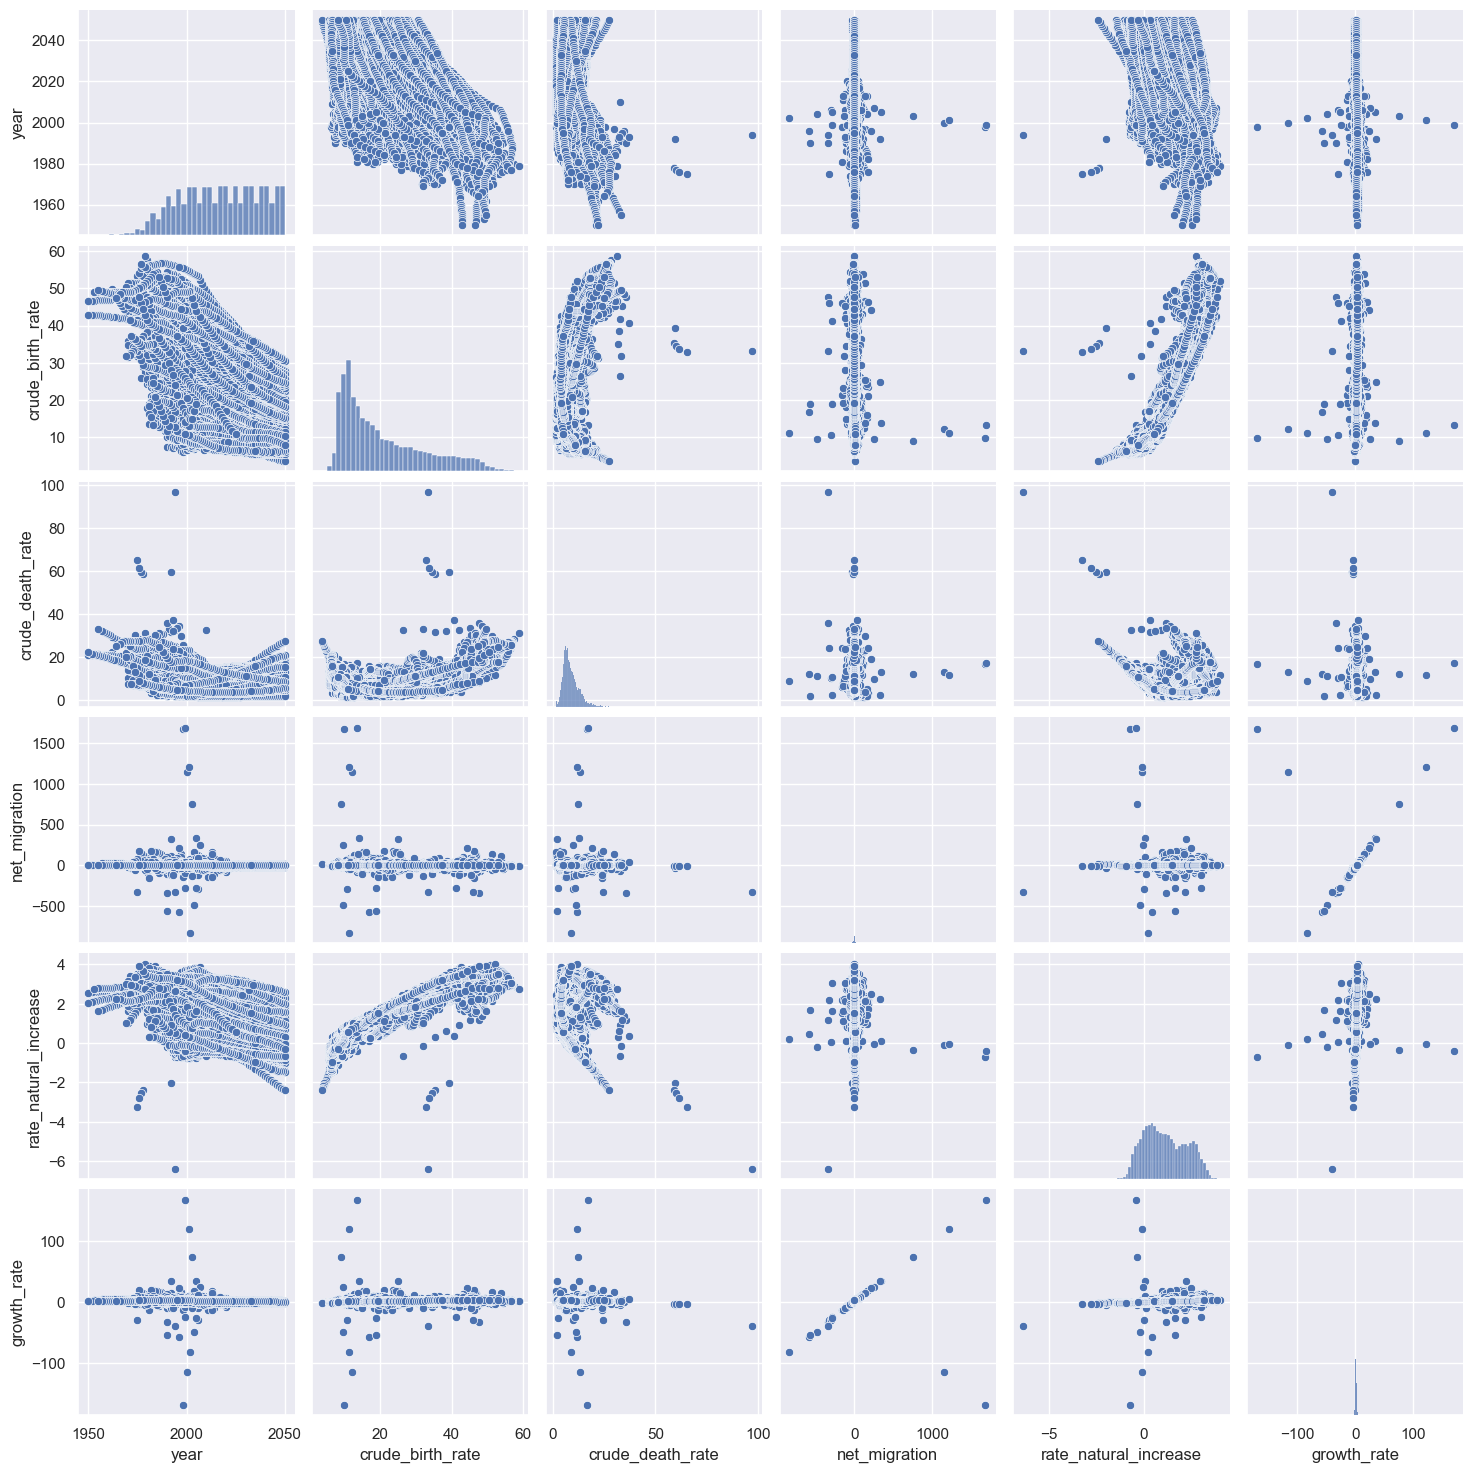

In [81]:
sns.pairplot(dff)

**Nhận xét:**

- Ta thấy được `crude_birth_rate` có chiều hướng giảm dần theo năm khá rõ rệt. Điều này có thể giải thích do các chính sách kế hoạch hóa gia đình hiện đại ngày nay.
- `crude_death_rate` có chiều hướng giảm đến các năm 2025 sau đó được dự đoán sẽ tăng lên nhẹ. Điều này có thể giải thích là sau khi kết thúc chiên tranh ở các năm 1985 trở về trước thì đời sống con người đi lên nên tỉ lệ tử giảm, đến 2040 về sau dân số đi vào trạng thái dân số già nên tỉ lệ tử vong sau đó được dự đoán tăng.
- `rate_natural_increase` tăng rõ rệt khi `crude_birth_rate` tăng.
- `net_migration` tăng thì `growth_rate` cũng tăng gần như tuyến tính theo.
- Các sự tương quan còn lại là tương quan yếu.

Ta có thể xem chi tiết hơn mối tương quan đơn của từng thuộc tính với nhau thông qua tương tác biểu đồ bên dưới.

In [83]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dff['year'], y=dff['net_migration'], mode='markers'))

dropdown_x = [{'label': 'X_year', 'method': 'update', 'args': [{'x': [dff['year']]}]}, 		
              {'label': 'X_crude_birth_rate', 'method': 'update', 'args': [{'x': [dff['crude_birth_rate']]}]},
              {'label': 'X_crude_death_rate', 'method': 'update', 'args': [{'x': [dff['crude_death_rate']]}]},
              {'label': 'X_net_migration', 'method': 'update', 'args': [{'x': [dff['net_migration']]}]},
              {'label': 'X_rate_natural_increase', 'method': 'update', 'args': [{'x': [dff['rate_natural_increase']]}]},
              {'label': 'X_growth_rate', 'method': 'update', 'args': [{'x': [dff['growth_rate']]}]}
              ]
dropdown_y = [{'label': 'Y_year', 'method': 'update', 'args': [{'y': [dff['year']]}]}, 		
              {'label': 'Y_crude_birth_rate', 'method': 'update', 'args': [{'y': [dff['crude_birth_rate']]}]},
              {'label': 'Y_crude_death_rate', 'method': 'update', 'args': [{'y': [dff['crude_death_rate']]}]},
              {'label': 'Y_net_migration', 'method': 'update', 'args': [{'y': [dff['net_migration']]}]},
              {'label': 'Y_rate_natural_increase', 'method': 'update', 'args': [{'y': [dff['rate_natural_increase']]}]},
              {'label': 'Y_growth_rate', 'method': 'update', 'args': [{'y': [dff['growth_rate']]}]}
              ]

fig.update_layout({'updatemenus': [{'buttons': dropdown_x, 'direction': 'right', 'showactive': True, 'x': 0.1, 'y': 1.35, 'name': 'Select_x-axis'},
                                   {'buttons': dropdown_y, 'direction': 'right', 'showactive': True, 'x': 0.1, 'y': 1.25, 'name': 'Select y-axis'}]},
                   xaxis={'title': 'X'},
                   yaxis={'title': 'Y'})

fig.show()

Dùng **heat map** trực quan `growth_rate` theo `country_code` và `year` (year sử dụng theo mỗi khoảng 5 năm)


In [84]:
dff['country_code'].unique()

array(['SI', 'LG', 'MG', 'MR', 'LI', 'TB', 'UP', 'CY', 'VE', 'ET', 'ZA',
       'NR', 'MX', 'ER', 'UC', 'RS', 'KS', 'SO', 'MD', 'MN', 'ID', 'MI',
       'AF', 'TV', 'WI', 'AM', 'KE', 'WF', 'NZ', 'IC', 'DR', 'WZ', 'EK',
       'RN', 'HU', 'FJ', 'ZI', 'EG', 'GZ', 'LS', 'SW', 'NO', 'SN', 'LO',
       'SA', 'FP', 'SH', 'US', 'CT', 'AV', 'KZ', 'PU', 'CW', 'GJ', 'GR',
       'FM', 'CH', 'PE', 'AC', 'CJ', 'GI', 'SZ', 'SC', 'BX', 'SP', 'IV',
       'EN', 'KV', 'LT', 'BT', 'PK', 'MT', 'IZ', 'CA', 'MK', 'JM', 'KN',
       'AL', 'UZ', 'MH', 'PM', 'MC', 'NP', 'BR', 'IR', 'WS', 'TO', 'SL',
       'MJ', 'MP', 'TD', 'AG', 'CB', 'EZ', 'LE', 'DA', 'LH', 'SF', 'CS',
       'IM', 'CE', 'HK', 'NN', 'BD', 'QA', 'PP', 'BO', 'AN', 'RO', 'VC',
       'GL', 'VI', 'ES', 'MY', 'RP', 'BF', 'BH', 'LA', 'PO', 'MU', 'NI',
       'IN', 'TI', 'BE', 'TX', 'AU', 'SE', 'AO', 'TS', 'TT', 'UV', 'FR',
       'BA', 'UY', 'VM', 'CG', 'LU', 'KR', 'BU', 'MV', 'BN', 'UK', 'DO',
       'BG', 'KU', 'EI', 'VQ', 'GA', 'NU', 'TW', 'A

Vì số lượng các nước lớn nên chọn đại diện các nước được ghi nhận dữ liệu đầy đủ nhất để trực quan.

In [86]:
def choice_country_code(k): # Chon country có số lần ghi nhận theo các năm > k 
    tmp = Counter(dff['country_code'])
    arr_country_code = []
    for i in tmp.keys():
        if tmp[i] > k:
            arr_country_code.append(i)
    return arr_country_code

arr_country_code = choice_country_code(80)
print(arr_country_code)

['WI', 'BT', 'BR', 'CB', 'LE', 'NI', 'AO', 'GH', 'DJ', 'GB', 'GV', 'UG', 'CD']


In [87]:
arr = [1950 + i*5 for i in range(20)]

def creat_df(arr_country_code, arr): # Tạo dataframe theo country đã chọn.
    data_f = pd.DataFrame()
    for j in arr_country_code:
        tmp_arr = []
        for i in arr:
            tr = dff[dff.year < i][dff.country_code == j]['growth_rate']
            if len(tr) != 0:
                tmp_arr.append(sum(tr)/len(tr))
            else:
                tmp_arr.append(0)

        data_f[str(j)] = tmp_arr

    data_f['year'] = arr
    data_f = data_f.set_index('year')
    return data_f

data_f = creat_df(arr_country_code, arr)

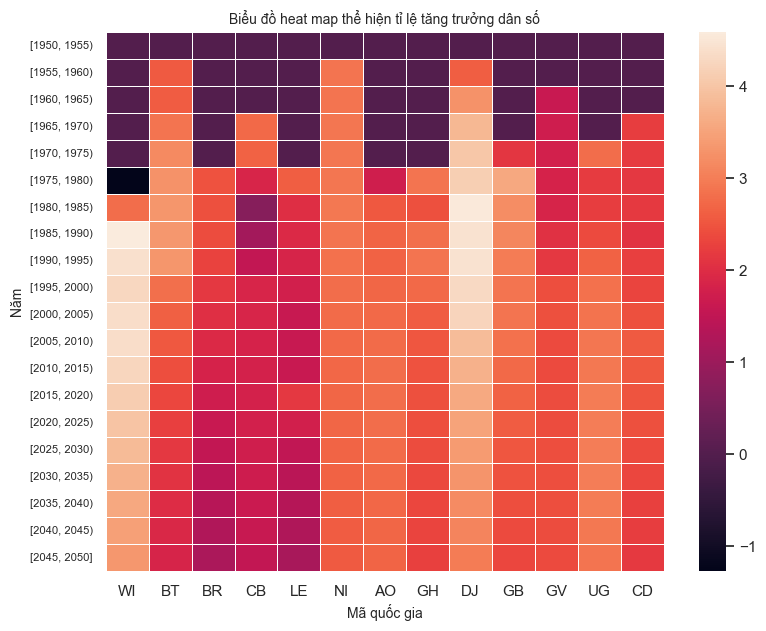

In [88]:
plt.figure(figsize=(9, 7))
index = np.arange(24)
col = ['['+ str(arr[i]) + ', ' + str(arr[i+1]) + ')' for i in range(19)]
col.append('[2045, 2050]')
sns.heatmap(data_f, linewidths = 0.5)
plt.title('Biểu đồ heat map thể hiện tỉ lệ tăng trưởng dân số', fontsize = 10)
plt.xlabel('Mã quốc gia', fontsize = 10)
plt.ylabel('Năm', fontsize = 10)
index = np.arange(len(arr))
plt.yticks(index + 0.5 , col, fontsize = 8, rotation = 0)
plt.show()

**Nhận xét:**

- Các năm 75 về trước thường được ghi nhận thiếu sót và có `growth_rate` (tỉ lệ tăng trưởng) thấp.
- WI hay Western Sahara có tốc độ tăng trưởng dân số mạnh vào 1985-2000 sau đó có dấu hiệu chửng lại, giảm ít. Có thể giải thích như sau: trong những năm đầu thập niên 1985 và 1990. Đây là thời điểm khi tỷ lệ sinh cao và tỷ lệ nhập cư đang đóng góp vào sự tăng trưởng dân số của vùng đất này. Tuy nhiên, các yếu tố như tranh chấp lãnh thổ và tình trạng kinh tế khó khăn có thể đã ảnh hưởng đến tăng trưởng dân số của Western Sahara trong những năm sau đó.
- DJ hay Djibouti vào thập niên 1980 và 2000 đã được ước tính ở mức trên 6 trẻ trên mỗi người phụ nữ, đây là một mức độ sinh sản rất cao. Song có sự cải thiện đáng kể trong các chỉ số y tế, bao gồm tỷ lệ tử vong trẻ em và trung bình tuổi thọ. Ngoài ra, Djibouti thu hút một số lượng lớn người nhập cư từ các quốc gia lân cận. Vì vậy Djibouti đã trải qua một giai đoạn tăng trưởng dân số đáng kể trong giai đoạn này.
- Các năm 2000 trở về sau tốc độ tăng trương dân số (`growth_rate`- tỉ lệ tăng trưởng) không có nhiều sự chuyển biến lớn giữa các năm. Các năm 2024 trở về sau, `growth_rate`(tỉ lệ tăng trưởng) được dự đoán ổn định cho mỗi nước.

Ta có thể xem chi tiết hơn về thông số `growth_rate` thông qua tương tác biểu đồ bên dưới.

In [90]:
arr_country_code = choice_country_code(72)

data_f = creat_df(arr_country_code, arr)

In [91]:
# Tạo VEX heatmap
fig = px.imshow(data_f, text_auto=True)

# Cấu hình trục x và y
fig.update_xaxes(title_text='X Axis Title')
fig.update_yaxes(title_text='Y Axis Title')
fig.update_layout(
    width=1200,  # Kích thước chiều rộng
    height=700,  # Kích thước chiều cao
    title='Biểu đồ heat map thể hiện tỉ lệ tăng trưởng dân số',  # Tiêu đề của biểu đồ
    font=dict(size=16),  # Cấu hình font chữ
    margin=dict(l=40, r=40, b=40, t=40),  # Cấu hình margin
    paper_bgcolor='white',  # Màu nền của giấy
    plot_bgcolor='white',  # Màu nền của plot
    xaxis=dict(title='Mã quốc gia'),  # Cấu hình trục x
    yaxis=dict(title='Năm'),  # Cấu hình trục y
    #  xgap=1, ygap=1
)

# Hiển thị biểu đồ
fig.show()

### Hồi quy tuyến tính đa tìm mối tương quan đa của `growth_rate` theo các thuộc tính còn lại, đồng thời cũng là mô hình dự đoán.

Xử lý các trường hợp điểm ngoại lai: Làm sạch dữ liệu theo `IQR`.

In [92]:
def outlier(dff, s):
    # Tính IQR cho cả x và y
    q1x = np.percentile(dff[s], 25)
    q3x = np.percentile(dff[s], 75)
    iqr_x = q3x - q1x

    # Xác định giới hạn trên và dưới cho cả x và y
    lower_bound_x = q1x - 1.5 * iqr_x
    upper_bound_x = q3x + 1.5 * iqr_x

    # Loại bỏ các điểm ngoại lai
    dff = dff.drop(dff[(dff[s] < lower_bound_x) | (dff[s] > upper_bound_x)].index)
    return dff

df_clearn = dff.copy()
for i in dff:
    if i != 'country_code' and i != 'country_name':
        df_clearn = outlier(df_clearn, i)

In [93]:
df_clearn.shape

(12089, 8)

Trực quan để xem lại dữ liệu sau khi làm sạch.

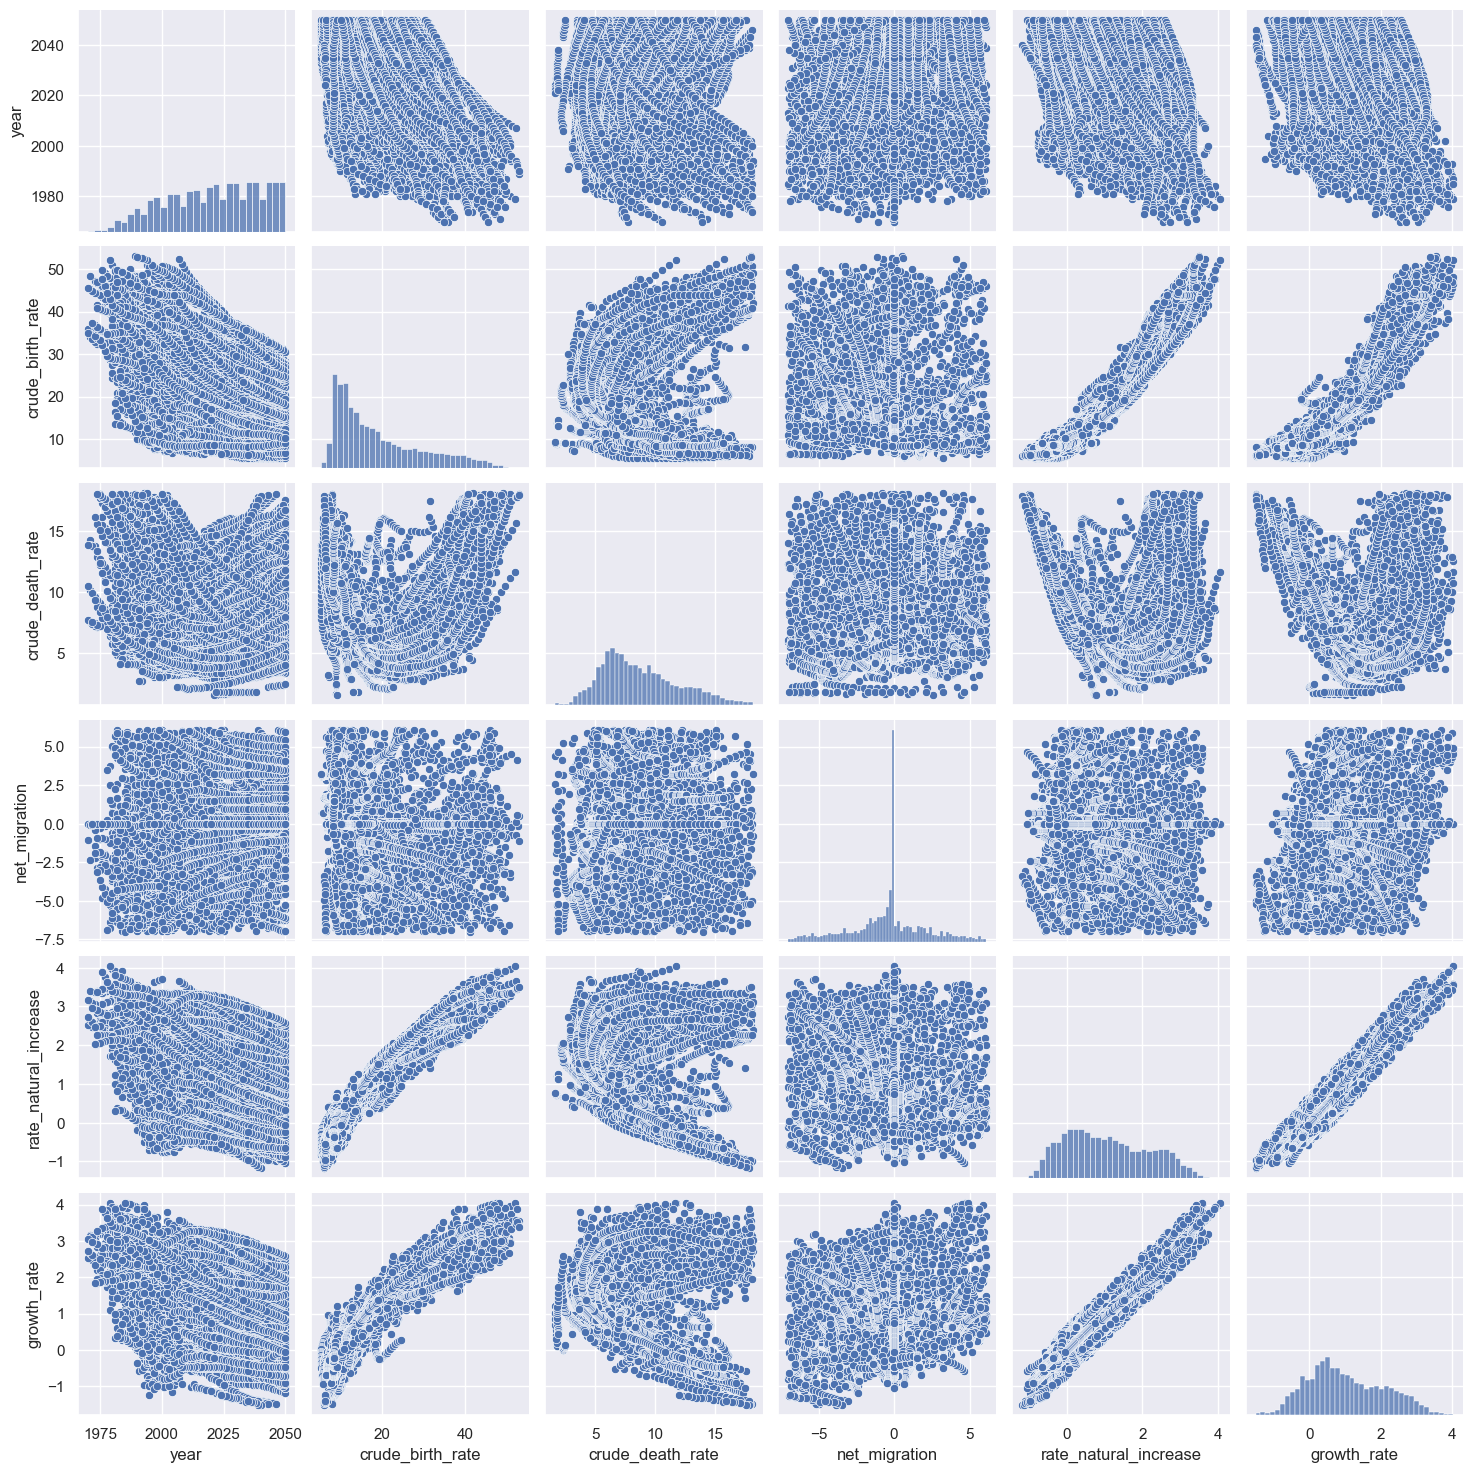

In [94]:
sns.pairplot(df_clearn)

Tạo các tập dữ liệu train test.

In [97]:
XX = df_clearn[[ 'year', 'crude_birth_rate', 'crude_death_rate', 'net_migration', 'rate_natural_increase']]
YY = df_clearn['growth_rate']

X_train, X_test, y_train, y_test = train_test_split( 
                        XX, YY, test_size = 0.3, random_state = 0) 


Train mô hình **linear regression**.

In [98]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)


LinearRegression()

Công thức hồi quy tuyến tính đơn biểu diễn `growth_rate` theo các thuộc tính còn lại.

In [99]:
# y= b + w1*x1 + w2*x2 + ... +  wn*xn
# w = [w1, w2, ..., wn]
w = linear_regression.coef_
b = linear_regression.intercept_

print('Các hệ số hồi quy w: ', w) 
print('Hệ số chặn b: ', b)

Các hệ số hồi quy w:  [ 4.65935089e-07  7.88035099e-02 -7.87998027e-02  9.99944203e-02
  2.11977779e-01]
Hệ số chặn b:  -0.0009918059650484423


Quan sát kết quả dự đoán và kết quả thực.

In [100]:
y_preds = linear_regression.predict(X_test[:15])
pd.DataFrame({'Y': y_test[:15], 'y_preds': y_preds})

Y   y_preds
6247   0.238  0.236993
4763   1.502  1.501998
4181   0.134  0.134976
5808  -0.234 -0.234009
1522   2.220  2.220046
3989   0.305  0.304979
8845   0.382  0.382989
13652  1.406  1.406009
14784  0.162  0.161997
11516 -0.149 -0.148011
4732   0.148  0.146975
2637   0.783  0.783956
9621  -1.300 -1.299973
5498   1.659  1.658983
1088  -0.848 -0.847992

Đánh giá hiệu suất mô hình:

In [102]:
# Đưa ra dự đoán trên tập kiểm tra
y_pred = linear_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)
print("MAE:", mae)

R^2: 0.9999996079282322
MSE: 4.3741780091939695e-07
MAE: 0.00034150091503168547


**Nhận xét:**

- Mô hình cho R^2 ~ 1 và MSE, MAE ~ 0 chứng tỏ rằng mô hình hồi quy tuyến tính đa biến rất phù hợp với tập dữ liệu trên.
- Thuộc tính growth_rate có mối tưởng quan đa với các thuộc tính còn lại.